In [ ]:
pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

In [2]:
import torch # pip install torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import lucem_illud
import gensim

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
gpu = torch.cuda.is_available()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if gpu:
    n_gpu = torch.cuda.device_count()
    torch.cuda.get_device_name(0)
device

device(type='cuda')

#Load Data and Helper Functions

In [4]:
import nltk
import spacy
import re

In [5]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
nlp = spacy.load("en")

In [7]:
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

In [8]:
def formatting(x):
    x = re.sub(r'[^a-zA-Z]+', ' ', x)
    x = re.sub(r'[^\w\s]','',x)
    return x 

In [9]:
def non_stopwords(word_list):
  word_filtered = []
  for w in word_list:
    if (w not in STOP) & (len(w) > 2):
        word_filtered.append(w)
  
  return word_filtered

In [10]:
MBTI = pd.read_csv("/content/drive/MyDrive/Final Project/mbti_1.csv")
MBTI.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


## Sentiment Analysis (Fig.4 & 5) 

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [12]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [13]:
sen = SentimentIntensityAnalyzer()

In [ ]:
types = ['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP','ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ']
compound_scores = {}
for type_ in types:
  df = MBTI[MBTI['type'] == type_]
  df['sentiments'] = df['posts'].apply(lambda x: sen.polarity_scores(x)['compound']) 
  compound_scores[type_] = df['sentiments'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
sortedTargets = sorted(compound_scores.items(), key = lambda x: x[1], reverse = False)
sortedTargets

[('ISTP', 0.7623047477744802),
 ('ESTJ', 0.7971230769230772),
 ('INTP', 0.800718634969325),
 ('INTJ', 0.808599175068743),
 ('ENTP', 0.8314979562043796),
 ('ESFP', 0.8433083333333332),
 ('ENTJ', 0.8560948051948052),
 ('ISTJ', 0.8767497560975611),
 ('INFP', 0.8877325873362459),
 ('ISFJ', 0.8935530120481923),
 ('ESTP', 0.909219101123595),
 ('ISFP', 0.9218612546125455),
 ('INFJ', 0.9285275510204082),
 ('ESFJ', 0.9491690476190475),
 ('ENFJ', 0.9544821052631568),
 ('ENFP', 0.9612118518518526)]

In [ ]:
Y = []
X = []
for i in range(len(sortedTargets)):
  Y.append(sortedTargets[i][1])
  X.append(sortedTargets[i][0])

In [ ]:
sum(Y)/len(Y)

0.8738845622775469

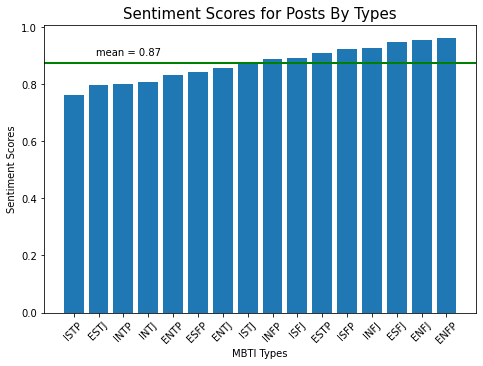

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X,Y)
ax.axhline(sum(Y)/len(Y), color='green', linewidth=2)
ax.annotate('mean = 0.87', xy=(0.9,0.9))
plt.xlabel("MBTI Types")
plt.ylabel("Sentiment Scores")
plt.title("Sentiment Scores for Posts By Types",size = 15)
plt.xticks(rotation=45)
plt.show()

In [ ]:
from os import listdir
from os.path import isfile, join

In [ ]:
onlyfiles = [f for f in listdir('/content/drive/MyDrive/Final Project') if isfile(join('/content/drive/MyDrive/Final Project', f))]

In [ ]:
files = []
for file_ in onlyfiles:
  if "All" in file_:
    files.append(file_)

In [ ]:
path = '/content/drive/MyDrive/Final Project/'
scores = {}
for i in range(len(files)):
  df = pd.read_csv(path+files[i])
  df['sentiments'] = df['Text'].astype(str).apply(lambda x: sen.polarity_scores(x)['compound']) 
  scores[(files[i][:4])] = df['sentiments'].mean()

In [ ]:
sortedTargets = sorted(scores.items(), key = lambda x: x[1], reverse = False)
sortedTargets

[('INTP', 0.12962602279543833),
 ('INTJ', 0.14036464307138463),
 ('ENTP', 0.14932658268346136),
 ('ISTP', 0.16957012636538737),
 ('INFP', 0.1696568726254723),
 ('ISFP', 0.19022190946972797),
 ('ENTJ', 0.19139034231784488),
 ('INFJ', 0.19476931013797327),
 ('ESTP', 0.19629790909090575),
 ('ENFP', 0.1969071425714851),
 ('ISTJ', 0.19735973680984376),
 ('ISFJ', 0.19779121551379616),
 ('ESFP', 0.22659712912087976),
 ('ENFJ', 0.23725920415917454),
 ('ESTJ', 0.24306312457717394),
 ('ESFJ', 0.2649749035679914)]

In [ ]:
Y = []
X = []
for i in range(len(sortedTargets)):
  Y.append(round(sortedTargets[i][1],2))
  X.append(sortedTargets[i][0])

In [ ]:
sum(Y)/len(Y)

0.19374999999999998

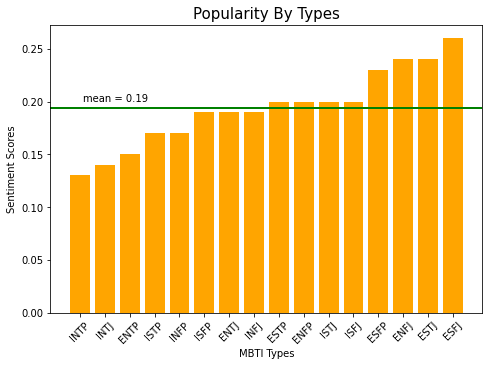

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X,Y, color = "orange")
ax.axhline(sum(Y)/len(Y), color='green', linewidth=2)
ax.annotate('mean = 0.19', xy=(0.1,0.2))
plt.xlabel("MBTI Types")
plt.ylabel("Sentiment Scores")
plt.title("Popularity By Types",size = 15)
plt.xticks(rotation=45)
plt.show()

## Social Interaction

In [19]:
import networkx as nx

In [ ]:
types = ['istj','istp','isfj','isfp',
         'infj','infp','intj','intp',
         'estp','estj','esfp','esfj',
         'enfp','enfj','entp','entj']

In [ ]:
def main_plot(Key):
    for key, value in freq.items():
      if key.upper() != Key:
        G.add_edges_from([(key.upper(), Key, {'weight': value})])

In [ ]:
def plot(Key):
    for i in All:
      if i.upper() != Key:
        for key, value in prop.items():
          if key.upper() != Key:
            G.add_edges_from([(i.upper(), Key, {'weight': value})])

## ENFJ

In [ ]:

df1 = pd.read_csv('/content/drive/MyDrive/Final Project/ENFJ_All_Tweets.csv')
df2 = MBTI[MBTI['type'] == 'ENFJ']
Merge = np.concatenate((df1['Text'], df2['posts']), axis = 0)

New = []
for _ in Merge:
    New.append(_.lower())

freq = {}
tt1 = 0
tt2 = 0 
tt3 = 0
tt4 = 0
tt5 = 0
tt6 = 0
tt7 = 0
tt8 = 0
tt9 = 0
tt10 = 0
tt11 = 0
tt12 = 0
tt13 = 0
tt14 = 0
tt15 = 0
tt16 = 0

for i in New:
  if 'istj' in i:
    tt1 += 1
  if 'istp' in i:
    tt2 += 1
  if 'isfj' in i:
    tt3 += 1
  if 'isfp' in i:
    tt4 += 1
  if 'infj' in i:
    tt5 += 1
  if 'infp' in i:
    tt6 += 1
  if 'intj' in i:
    tt7 += 1
  if 'intp' in i:
    tt8 += 1
  if 'estp' in i:
    tt9 += 1
  if 'estj' in i:
    tt10 += 1
  if 'esfp' in i:
    tt11 += 1
  if 'esfj' in i:
    tt12 += 1
  if 'enfp' in i:
    tt13 += 1
  if 'enfj' in i:
    tt14 += 1
  if 'entp' in i:
    tt15 += 1
  if 'entj' in i:
    tt16 += 1
  
  freq['istj'] = tt1
  freq['istp'] = tt2 
  freq['isfj'] = tt3 
  freq['isfp'] = tt4 
  freq['infj'] = tt5 
  freq['infp'] = tt6 
  freq['intj'] = tt7 
  freq['intp'] = tt8 
  freq['estp'] = tt9 
  freq['estj'] = tt10 
  freq['esfp'] = tt11 
  freq['esfj'] = tt12 
  freq['enfp'] = tt13
  freq['enfj'] = tt14 
  freq['entp'] = tt15
  freq['entj'] = tt16 

sorted(freq.items(), key = lambda x: x[1], reverse = True)

[('enfj', 24758),
 ('infj', 2611),
 ('infp', 2253),
 ('enfp', 2213),
 ('entj', 1153),
 ('esfj', 1125),
 ('intj', 1093),
 ('intp', 1090),
 ('entp', 925),
 ('isfp', 783),
 ('isfj', 769),
 ('istp', 757),
 ('esfp', 745),
 ('estp', 719),
 ('istj', 639),
 ('estj', 614)]

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ',
                  'ISFP','ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

colors = ['orange','skyblue','orange','skyblue','tomato',
          'skyblue','skyblue','skyblue','skyblue','skyblue',
          'skyblue','skyblue','skyblue','skyblue','skyblue','orange']

G.add_edges_from([('ENFP', 'ENFJ', {'weight': 2213})])
G.add_edges_from([('INFJ', 'ENFJ', {'weight': 2611})])
G.add_edges_from([('ENTJ', 'ENFJ', {'weight': 1153})])
G.add_edges_from([('ENTP', 'ENFJ', {'weight': 925})])
G.add_edges_from([('ESFJ', 'ENFJ', {'weight': 1125})])
G.add_edges_from([('ESFP', 'ENFJ', {'weight': 745})])
G.add_edges_from([('ESTJ', 'ENFJ', {'weight': 614})])
G.add_edges_from([('ESTP', 'ENFJ', {'weight': 719})])
G.add_edges_from([('INFP', 'ENFJ', {'weight': 2253})])
G.add_edges_from([('INTJ', 'ENFJ', {'weight': 1093})])
G.add_edges_from([('INTP', 'ENFJ', {'weight': 1090})])
G.add_edges_from([('ISFJ', 'ENFJ', {'weight': 769})])
G.add_edges_from([('ISFP', 'ENFJ', {'weight': 783})])
G.add_edges_from([('ISTJ', 'ENFJ', {'weight': 639})])
G.add_edges_from([('ISTP', 'ENFJ', {'weight': 757})])

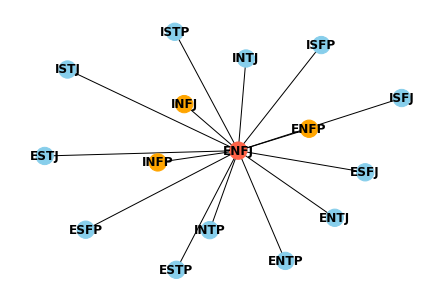

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

In [ ]:
f1 = []
f2 = []
f3 = []
f4 = []
f5 = []
f6 = []
f7 = []
f8 = []
f9 = []
f10 = []
f11 = []
f12 = []
f13 = []
f14 = []
f15 = []
f16 = []

In [ ]:
for i in New:
  if 'istj' in i:
    f1.append(i)
  if 'istp' in i:
    f2.append(i)
  if 'isfj' in i:
    f3.append(i)
  if 'isfp' in i:
    f4.append(i)
  if 'infj' in i:
    f5.append(i)
  if 'infp' in i:
    f6.append(i)
  if 'intj' in i:
    f7.append(i)
  if 'intp' in i:
    f8.append(i)
  if 'estp' in i:
    f9.append(i)
  if 'estj' in i:
    f10.append(i)
  if 'esfp' in i:
    f11.append(i)
  if 'esfj' in i:
    f12.append(i)
  if 'enfp' in i:
    f13.append(i)
  if 'enfj' in i:
    f14.append(i)
  if 'entp' in i:
    f15.append(i)
  if 'entj' in i:
    f16.append(i)

In [ ]:
dfs = [f1,f2,f3,f4,f5,f6,f7,f8,
       f9,f10,f11,f12,f13,f14,f15,f16]

In [ ]:
 All =  ['istj','istp','isfj','isfp',
         'infj','infp','intj','intp',
         'estp','estj','esfp','esfj',
         'enfp','enfj','entp','entj']

In [ ]:
prop = {}
for i in range(len(dfs)):
  count = 0
  for row in dfs[i]:
    values = sen.polarity_scores(str(row))['compound']
    if values > 0:
        count += 1
  prop[All[i]] = (round(count/len(dfs[i]),2)) * 100

In [ ]:
sorted(prop.items(), key = lambda x: x[1], reverse = True)

[('infp', 56.00000000000001),
 ('enfp', 54.0),
 ('infj', 53.0),
 ('enfj', 53.0),
 ('intp', 52.0),
 ('esfp', 51.0),
 ('esfj', 51.0),
 ('istj', 50.0),
 ('isfj', 50.0),
 ('isfp', 50.0),
 ('intj', 50.0),
 ('estj', 50.0),
 ('entp', 50.0),
 ('entj', 50.0),
 ('istp', 48.0),
 ('estp', 48.0)]

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
plot("ENFJ")

In [ ]:
colors = ['orange','skyblue','orange','skyblue','tomato','skyblue','skyblue','skyblue',
          'skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue']

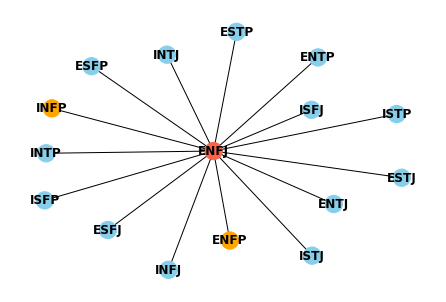

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

## ENFP

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Final Project/ENFP_All_Tweets.csv')
df2 = MBTI[MBTI['type'] == 'ENFP']
Merge = np.concatenate((df1['Text'], df2['posts']), axis = 0)

New = []
for _ in Merge:
    New.append(_.lower())

freq = {}
tt1 = 0
tt2 = 0 
tt3 = 0
tt4 = 0
tt5 = 0
tt6 = 0
tt7 = 0
tt8 = 0
tt9 = 0
tt10 = 0
tt11 = 0
tt12 = 0
tt13 = 0
tt14 = 0
tt15 = 0
tt16 = 0

for i in New:
  if 'istj' in i:
    tt1 += 1
  if 'istp' in i:
    tt2 += 1
  if 'isfj' in i:
    tt3 += 1
  if 'isfp' in i:
    tt4 += 1
  if 'infj' in i:
    tt5 += 1
  if 'infp' in i:
    tt6 += 1
  if 'intj' in i:
    tt7 += 1
  if 'intp' in i:
    tt8 += 1
  if 'estp' in i:
    tt9 += 1
  if 'estj' in i:
    tt10 += 1
  if 'esfp' in i:
    tt11 += 1
  if 'esfj' in i:
    tt12 += 1
  if 'enfp' in i:
    tt13 += 1
  if 'enfj' in i:
    tt14 += 1
  if 'entp' in i:
    tt15 += 1
  if 'entj' in i:
    tt16 += 1
  
  freq['istj'] = tt1
  freq['istp'] = tt2 
  freq['isfj'] = tt3 
  freq['isfp'] = tt4 
  freq['infj'] = tt5 
  freq['infp'] = tt6 
  freq['intj'] = tt7 
  freq['intp'] = tt8 
  freq['estp'] = tt9 
  freq['estj'] = tt10 
  freq['esfp'] = tt11 
  freq['esfj'] = tt12 
  freq['enfp'] = tt13
  freq['enfj'] = tt14 
  freq['entp'] = tt15
  freq['entj'] = tt16 

sorted(freq.items(), key = lambda x: x[1], reverse = True)

[('enfp', 25625),
 ('infp', 3144),
 ('infj', 1664),
 ('entp', 1614),
 ('intj', 1405),
 ('enfj', 1349),
 ('intp', 1195),
 ('esfp', 960),
 ('istj', 750),
 ('entj', 732),
 ('isfp', 703),
 ('isfj', 657),
 ('esfj', 627),
 ('estp', 609),
 ('istp', 586),
 ('estj', 521)]

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
main_plot("ENFP")

In [ ]:
colors = ['orange','skyblue','tomato','skyblue','skyblue','orange','skyblue','skyblue',
          'skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','orange']

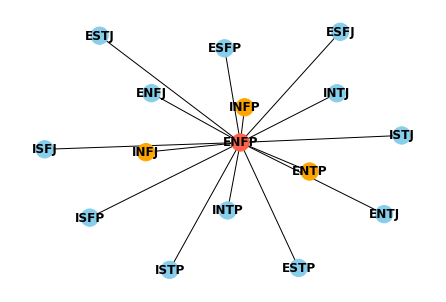

In [ ]:
n1 = nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

In [ ]:
f1 = []
f2 = []
f3 = []
f4 = []
f5 = []
f6 = []
f7 = []
f8 = []
f9 = []
f10 = []
f11 = []
f12 = []
f13 = []
f14 = []
f15 = []
f16 = []

In [ ]:
for i in New:
  if 'istj' in i:
    f1.append(i)
  if 'istp' in i:
    f2.append(i)
  if 'isfj' in i:
    f3.append(i)
  if 'isfp' in i:
    f4.append(i)
  if 'infj' in i:
    f5.append(i)
  if 'infp' in i:
    f6.append(i)
  if 'intj' in i:
    f7.append(i)
  if 'intp' in i:
    f8.append(i)
  if 'estp' in i:
    f9.append(i)
  if 'estj' in i:
    f10.append(i)
  if 'esfp' in i:
    f11.append(i)
  if 'esfj' in i:
    f12.append(i)
  if 'enfp' in i:
    f13.append(i)
  if 'enfj' in i:
    f14.append(i)
  if 'entp' in i:
    f15.append(i)
  if 'entj' in i:
    f16.append(i)

In [ ]:
dfs = [f1,f2,f3,f4,f5,f6,f7,f8,
       f9,f10,f11,f12,f13,f14,f15,f16]

In [ ]:
 All =  ['istj','istp','isfj','isfp',
         'infj','infp','intj','intp',
         'estp','estj','esfp','esfj',
         'enfp','enfj','entp','entj']

In [ ]:
prop = {}
for i in range(len(dfs)):
  count = 0
  for row in dfs[i]:
    values = sen.polarity_scores(str(row))['compound']
    if values > 0:
        count += 1
  prop[All[i]] = (round(count/len(dfs[i]),2)) * 100

In [ ]:
sorted(prop.items(), key = lambda x: x[1], reverse = True)

[('intj', 63.0),
 ('infj', 61.0),
 ('entj', 60.0),
 ('estj', 59.0),
 ('istj', 57.99999999999999),
 ('esfj', 57.99999999999999),
 ('intp', 56.99999999999999),
 ('enfj', 56.99999999999999),
 ('istp', 56.00000000000001),
 ('isfj', 56.00000000000001),
 ('esfp', 56.00000000000001),
 ('estp', 55.00000000000001),
 ('isfp', 53.0),
 ('infp', 53.0),
 ('entp', 53.0),
 ('enfp', 51.0)]

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
plot("ENFP")

In [ ]:
colors = ['skyblue','green','tomato','skyblue','skyblue','skyblue','skyblue','skyblue',
          'skyblue','skyblue','skyblue','green','skyblue','skyblue','skyblue','orange']

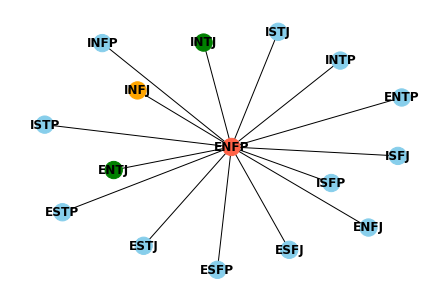

In [ ]:
n2 = nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

In [ ]:
freq = {}
tt1 = 0
tt2 = 0 
tt3 = 0
tt4 = 0
tt5 = 0
tt6 = 0
tt7 = 0
tt8 = 0
tt9 = 0
tt10 = 0
tt11 = 0
tt12 = 0
tt13 = 0
tt14 = 0
tt15 = 0
tt16 = 0

In [ ]:
for i in New:
  if 'istj' in i:
    tt1 += 1
  if 'istp' in i:
    tt2 += 1
  if 'isfj' in i:
    tt3 += 1
  if 'isfp' in i:
    tt4 += 1
  if 'infj' in i:
    tt5 += 1
  if 'infp' in i:
    tt6 += 1
  if 'intj' in i:
    tt7 += 1
  if 'intp' in i:
    tt8 += 1
  if 'estj' in i:
    tt9 += 1
  if 'estp' in i:
    tt10 += 1
  if 'esfj' in i:
    tt11 += 1
  if 'esfp' in i:
    tt12 += 1
  if 'enfj' in i:
    tt13 += 1
  if 'enfp' in i:
    tt14 += 1
  if 'entp' in i:
    tt15 += 1
  if 'entj' in i:
    tt16 += 1
  
  freq['istj'] = tt1
  freq['istp'] = tt2 
  freq['isfj'] = tt3 
  freq['isfp'] = tt4 
  freq['infj'] = tt5 
  freq['infp'] = tt6 
  freq['intj'] = tt7 
  freq['intp'] = tt8 
  freq['estj'] = tt9 
  freq['estp'] = tt10 
  freq['esfj'] = tt11 
  freq['esfp'] = tt12 
  freq['enfj'] = tt13
  freq['enfp'] = tt14 
  freq['entp'] = tt15
  freq['entj'] = tt16 

In [ ]:
sorted(freq.items(), key = lambda x: x[1], reverse = True)

[('infj', 26278),
 ('infp', 2427),
 ('intj', 1597),
 ('enfp', 1068),
 ('intp', 953),
 ('enfj', 908),
 ('entp', 832),
 ('isfj', 734),
 ('isfp', 551),
 ('istj', 524),
 ('istp', 469),
 ('estp', 455),
 ('entj', 427),
 ('esfp', 398),
 ('esfj', 365),
 ('estj', 340)]

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ',
                  'ISFP','ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
colors = ['orange','orange','orange','skyblue','skyblue',
          'skyblue','skyblue','skyblue','skyblue','skyblue',
          'skyblue','skyblue','skyblue','skyblue','skyblue','tomato']

In [ ]:
G.add_edges_from([('ENFP', 'INFJ', {'weight': 1068})])
G.add_edges_from([('ENFJ', 'INFJ', {'weight': 908})])
G.add_edges_from([('ENTJ', 'INFJ', {'weight': 427})])
G.add_edges_from([('ENTP', 'INFJ', {'weight': 832})])
G.add_edges_from([('ESFJ', 'INFJ', {'weight': 365})])
G.add_edges_from([('ESFP', 'INFJ', {'weight': 398})])
G.add_edges_from([('ESTJ', 'INFJ', {'weight': 340})])
G.add_edges_from([('ESTP', 'INFJ', {'weight': 455})])
G.add_edges_from([('INFP', 'INFJ', {'weight': 2427})])
G.add_edges_from([('INTJ', 'INFJ', {'weight': 1597})])
G.add_edges_from([('INTP', 'INFJ', {'weight': 953})])
G.add_edges_from([('ISFJ', 'INFJ', {'weight': 734})])
G.add_edges_from([('ISFP', 'INFJ', {'weight': 551})])
G.add_edges_from([('ISTJ', 'INFJ', {'weight': 524})])
G.add_edges_from([('ISTP', 'INFJ', {'weight': 469})])

In [ ]:
cc = ['blue','blue','blue','blue','blue',
      'blue','blue','blue','blue','blue',
      'blue','blue','blue','blue','blue']

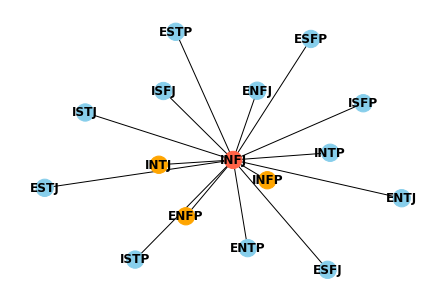

In [ ]:
#nx.draw(G, node_color=colors, edge_color = cc, with_labels=True, font_weight='bold')
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

## ENTJ

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Final Project/ENTJ_All_Tweets.csv')
df2 = MBTI[MBTI['type'] == 'ENTJ']
Merge = np.concatenate((df1['Text'], df2['posts']), axis = 0)

New = []
for _ in Merge:
    New.append(str(_).lower())

freq = {}
tt1 = 0
tt2 = 0 
tt3 = 0
tt4 = 0
tt5 = 0
tt6 = 0
tt7 = 0
tt8 = 0
tt9 = 0
tt10 = 0
tt11 = 0
tt12 = 0
tt13 = 0
tt14 = 0
tt15 = 0
tt16 = 0

for i in New:
  if 'istj' in i:
    tt1 += 1
  if 'istp' in i:
    tt2 += 1
  if 'isfj' in i:
    tt3 += 1
  if 'isfp' in i:
    tt4 += 1
  if 'infj' in i:
    tt5 += 1
  if 'infp' in i:
    tt6 += 1
  if 'intj' in i:
    tt7 += 1
  if 'intp' in i:
    tt8 += 1
  if 'estp' in i:
    tt9 += 1
  if 'estj' in i:
    tt10 += 1
  if 'esfp' in i:
    tt11 += 1
  if 'esfj' in i:
    tt12 += 1
  if 'enfp' in i:
    tt13 += 1
  if 'enfj' in i:
    tt14 += 1
  if 'entp' in i:
    tt15 += 1
  if 'entj' in i:
    tt16 += 1
  
  freq['istj'] = tt1
  freq['istp'] = tt2 
  freq['isfj'] = tt3 
  freq['isfp'] = tt4 
  freq['infj'] = tt5 
  freq['infp'] = tt6 
  freq['intj'] = tt7 
  freq['intp'] = tt8 
  freq['estp'] = tt9 
  freq['estj'] = tt10 
  freq['esfp'] = tt11 
  freq['esfj'] = tt12 
  freq['enfp'] = tt13
  freq['enfj'] = tt14 
  freq['entp'] = tt15
  freq['entj'] = tt16 

sorted(freq.items(), key = lambda x: x[1], reverse = True)

[('entj', 25050),
 ('intj', 3235),
 ('entp', 2392),
 ('intp', 2135),
 ('enfj', 1829),
 ('infp', 1805),
 ('enfp', 1723),
 ('infj', 1666),
 ('estj', 1538),
 ('estp', 1175),
 ('istj', 1134),
 ('isfp', 1134),
 ('esfp', 1055),
 ('istp', 1039),
 ('esfj', 999),
 ('isfj', 998)]

In [ ]:
colors = ['skyblue','orange','skyblue','orange','skyblue','orange','skyblue','skyblue',
          'skyblue','skyblue','skyblue','tomato','skyblue','skyblue','skyblue','orange']

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
main_plot("ENTJ")

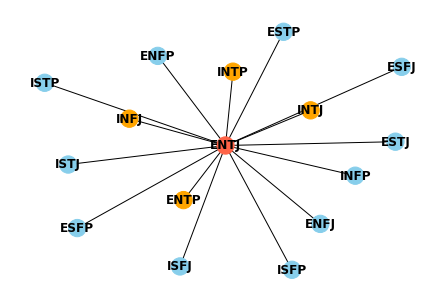

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

In [ ]:
f1 = []
f2 = []
f3 = []
f4 = []
f5 = []
f6 = []
f7 = []
f8 = []
f9 = []
f10 = []
f11 = []
f12 = []
f13 = []
f14 = []
f15 = []
f16 = []

In [ ]:
for i in New:
  if 'istj' in i:
    f1.append(i)
  if 'istp' in i:
    f2.append(i)
  if 'isfj' in i:
    f3.append(i)
  if 'isfp' in i:
    f4.append(i)
  if 'infj' in i:
    f5.append(i)
  if 'infp' in i:
    f6.append(i)
  if 'intj' in i:
    f7.append(i)
  if 'intp' in i:
    f8.append(i)
  if 'estp' in i:
    f9.append(i)
  if 'estj' in i:
    f10.append(i)
  if 'esfp' in i:
    f11.append(i)
  if 'esfj' in i:
    f12.append(i)
  if 'enfp' in i:
    f13.append(i)
  if 'enfj' in i:
    f14.append(i)
  if 'entp' in i:
    f15.append(i)
  if 'entj' in i:
    f16.append(i)

In [ ]:
dfs = [f1,f2,f3,f4,f5,f6,f7,f8,
       f9,f10,f11,f12,f13,f14,f15,f16]

In [ ]:
prop = {}
for i in range(len(dfs)):
  count = 0
  for row in dfs[i]:
    values = sen.polarity_scores(str(row))['compound']
    if values > 0:
        count += 1
  prop[All[i]] = (round(count/len(dfs[i]),2)) * 100

In [ ]:
def plot(Key):
    
    for key, value in prop.items():
      if key.upper() != Key:
        G.add_edges_from([(key.upper(), Key, {'weight': value})])

In [ ]:
sorted(prop.items(), key = lambda x: x[1], reverse = True)

[('infp', 52.0),
 ('enfp', 51.0),
 ('estj', 50.0),
 ('entj', 50.0),
 ('intp', 49.0),
 ('esfp', 49.0),
 ('enfj', 49.0),
 ('isfj', 48.0),
 ('isfp', 48.0),
 ('infj', 48.0),
 ('intj', 48.0),
 ('estp', 48.0),
 ('esfj', 48.0),
 ('entp', 48.0),
 ('istj', 47.0),
 ('istp', 46.0)]

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
colors = ['green','skyblue','green','skyblue','skyblue','skyblue','skyblue','skyblue',
          'skyblue','skyblue','skyblue','tomato','skyblue','skyblue','green','skyblue']

In [ ]:
plot("ENTJ")

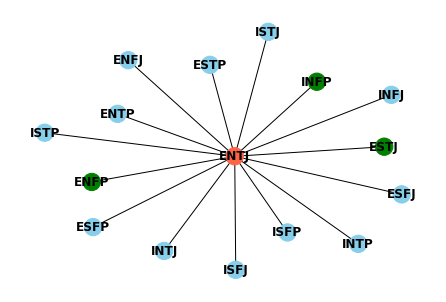

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

## ENTP

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Final Project/ENTP_All_Tweets.csv')
df2 = MBTI[MBTI['type'] == 'ENTP']
Merge = np.concatenate((df1['Text'], df2['posts']), axis = 0)

New = []
for _ in Merge:
    New.append(str(_).lower())

freq = {}
tt1 = 0
tt2 = 0 
tt3 = 0
tt4 = 0
tt5 = 0
tt6 = 0
tt7 = 0
tt8 = 0
tt9 = 0
tt10 = 0
tt11 = 0
tt12 = 0
tt13 = 0
tt14 = 0
tt15 = 0
tt16 = 0

for i in New:
  if 'istj' in i:
    tt1 += 1
  if 'istp' in i:
    tt2 += 1
  if 'isfj' in i:
    tt3 += 1
  if 'isfp' in i:
    tt4 += 1
  if 'infj' in i:
    tt5 += 1
  if 'infp' in i:
    tt6 += 1
  if 'intj' in i:
    tt7 += 1
  if 'intp' in i:
    tt8 += 1
  if 'estp' in i:
    tt9 += 1
  if 'estj' in i:
    tt10 += 1
  if 'esfp' in i:
    tt11 += 1
  if 'esfj' in i:
    tt12 += 1
  if 'enfp' in i:
    tt13 += 1
  if 'enfj' in i:
    tt14 += 1
  if 'entp' in i:
    tt15 += 1
  if 'entj' in i:
    tt16 += 1
  
  freq['istj'] = tt1
  freq['istp'] = tt2 
  freq['isfj'] = tt3 
  freq['isfp'] = tt4 
  freq['infj'] = tt5 
  freq['infp'] = tt6 
  freq['intj'] = tt7 
  freq['intp'] = tt8 
  freq['estp'] = tt9 
  freq['estj'] = tt10 
  freq['esfp'] = tt11 
  freq['esfj'] = tt12 
  freq['enfp'] = tt13
  freq['enfj'] = tt14 
  freq['entp'] = tt15
  freq['entj'] = tt16 

sorted(freq.items(), key = lambda x: x[1], reverse = True)

[('entp', 25603),
 ('intp', 2530),
 ('enfp', 2213),
 ('intj', 1698),
 ('infj', 1591),
 ('infp', 1579),
 ('entj', 1342),
 ('estp', 1021),
 ('enfj', 868),
 ('isfj', 850),
 ('istp', 791),
 ('isfp', 707),
 ('istj', 698),
 ('esfp', 695),
 ('esfj', 679),
 ('estj', 655)]

In [ ]:
colors = ['skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue',
          'skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue']

In [ ]:
colors = ['skyblue','orange','orange','orange','skyblue','tomato','skyblue','skyblue',
          'skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue']

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
main_plot("ENTP")

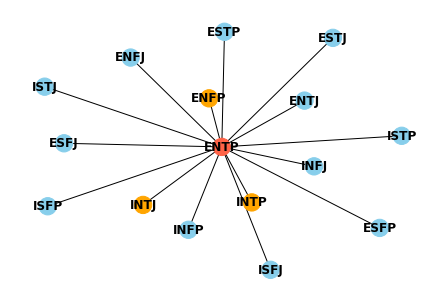

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

In [ ]:
f1 = []
f2 = []
f3 = []
f4 = []
f5 = []
f6 = []
f7 = []
f8 = []
f9 = []
f10 = []
f11 = []
f12 = []
f13 = []
f14 = []
f15 = []
f16 = []

for i in New:
  if 'istj' in i:
    f1.append(i)
  if 'istp' in i:
    f2.append(i)
  if 'isfj' in i:
    f3.append(i)
  if 'isfp' in i:
    f4.append(i)
  if 'infj' in i:
    f5.append(i)
  if 'infp' in i:
    f6.append(i)
  if 'intj' in i:
    f7.append(i)
  if 'intp' in i:
    f8.append(i)
  if 'estp' in i:
    f9.append(i)
  if 'estj' in i:
    f10.append(i)
  if 'esfp' in i:
    f11.append(i)
  if 'esfj' in i:
    f12.append(i)
  if 'enfp' in i:
    f13.append(i)
  if 'enfj' in i:
    f14.append(i)
  if 'entp' in i:
    f15.append(i)
  if 'entj' in i:
    f16.append(i)

dfs = [f1,f2,f3,f4,f5,f6,f7,f8,
       f9,f10,f11,f12,f13,f14,f15,f16]

prop = {}
for i in range(len(dfs)):
  count = 0
  for row in dfs[i]:
    values = sen.polarity_scores(str(row))['compound']
    if values > 0:
        count += 1
  prop[All[i]] = (round(count/len(dfs[i]),2)) * 100

In [ ]:
sorted(prop.items(), key = lambda x: x[1], reverse = True)

[('infp', 52.0),
 ('enfp', 51.0),
 ('estj', 50.0),
 ('entj', 50.0),
 ('intp', 49.0),
 ('esfp', 49.0),
 ('enfj', 49.0),
 ('isfj', 48.0),
 ('isfp', 48.0),
 ('infj', 48.0),
 ('intj', 48.0),
 ('estp', 48.0),
 ('esfj', 48.0),
 ('entp', 48.0),
 ('istj', 47.0),
 ('istp', 46.0)]

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
colors = ['green','skyblue','orange','skyblue','skyblue','tomato','skyblue','skyblue',
          'skyblue','skyblue','skyblue','green','skyblue','skyblue','green','skyblue']

In [ ]:
plot("ENTP")

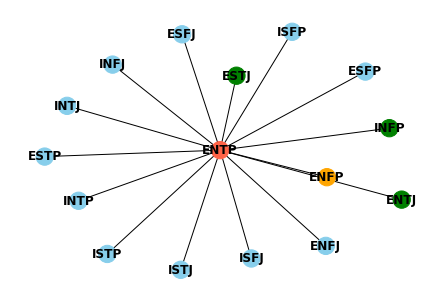

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

## ESFJ

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Final Project/ESFJ_All_Tweets.csv')
df2 = MBTI[MBTI['type'] == 'ESFJ']
Merge = np.concatenate((df1['Text'], df2['posts']), axis = 0)

New = []
for _ in Merge:
    New.append(str(_).lower())

freq = {}
tt1 = 0
tt2 = 0 
tt3 = 0
tt4 = 0
tt5 = 0
tt6 = 0
tt7 = 0
tt8 = 0
tt9 = 0
tt10 = 0
tt11 = 0
tt12 = 0
tt13 = 0
tt14 = 0
tt15 = 0
tt16 = 0

for i in New:
  if 'istj' in i:
    tt1 += 1
  if 'istp' in i:
    tt2 += 1
  if 'isfj' in i:
    tt3 += 1
  if 'isfp' in i:
    tt4 += 1
  if 'infj' in i:
    tt5 += 1
  if 'infp' in i:
    tt6 += 1
  if 'intj' in i:
    tt7 += 1
  if 'intp' in i:
    tt8 += 1
  if 'estp' in i:
    tt9 += 1
  if 'estj' in i:
    tt10 += 1
  if 'esfp' in i:
    tt11 += 1
  if 'esfj' in i:
    tt12 += 1
  if 'enfp' in i:
    tt13 += 1
  if 'enfj' in i:
    tt14 += 1
  if 'entp' in i:
    tt15 += 1
  if 'entj' in i:
    tt16 += 1
  
  freq['istj'] = tt1
  freq['istp'] = tt2 
  freq['isfj'] = tt3 
  freq['isfp'] = tt4 
  freq['infj'] = tt5 
  freq['infp'] = tt6 
  freq['intj'] = tt7 
  freq['intp'] = tt8 
  freq['estp'] = tt9 
  freq['estj'] = tt10 
  freq['esfp'] = tt11 
  freq['esfj'] = tt12 
  freq['enfp'] = tt13
  freq['enfj'] = tt14 
  freq['entp'] = tt15
  freq['entj'] = tt16 

sorted(freq.items(), key = lambda x: x[1], reverse = True)

[('esfj', 20523),
 ('enfj', 2371),
 ('isfj', 2230),
 ('infp', 2016),
 ('intp', 1963),
 ('enfp', 1946),
 ('esfp', 1719),
 ('infj', 1701),
 ('isfp', 1642),
 ('estj', 1557),
 ('entp', 1510),
 ('intj', 1452),
 ('istj', 1353),
 ('entj', 1339),
 ('istp', 1323),
 ('estp', 1284)]

In [ ]:
colors = ['skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue',
          'skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue']

In [ ]:
colors = ['orange','skyblue','skyblue','skyblue','orange','skyblue','orange','skyblue',
          'skyblue','skyblue','skyblue','skyblue','skyblue','tomato','skyblue','skyblue']

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
main_plot("ESFJ")

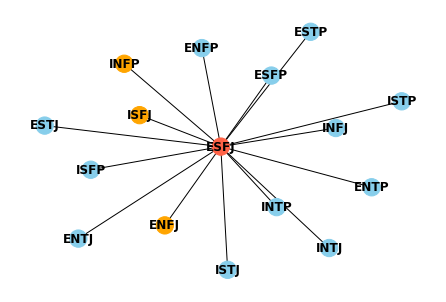

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

In [ ]:
f1 = []
f2 = []
f3 = []
f4 = []
f5 = []
f6 = []
f7 = []
f8 = []
f9 = []
f10 = []
f11 = []
f12 = []
f13 = []
f14 = []
f15 = []
f16 = []

for i in New:
  if 'istj' in i:
    f1.append(i)
  if 'istp' in i:
    f2.append(i)
  if 'isfj' in i:
    f3.append(i)
  if 'isfp' in i:
    f4.append(i)
  if 'infj' in i:
    f5.append(i)
  if 'infp' in i:
    f6.append(i)
  if 'intj' in i:
    f7.append(i)
  if 'intp' in i:
    f8.append(i)
  if 'estp' in i:
    f9.append(i)
  if 'estj' in i:
    f10.append(i)
  if 'esfp' in i:
    f11.append(i)
  if 'esfj' in i:
    f12.append(i)
  if 'enfp' in i:
    f13.append(i)
  if 'enfj' in i:
    f14.append(i)
  if 'entp' in i:
    f15.append(i)
  if 'entj' in i:
    f16.append(i)

dfs = [f1,f2,f3,f4,f5,f6,f7,f8,
       f9,f10,f11,f12,f13,f14,f15,f16]

prop = {}
for i in range(len(dfs)):
  count = 0
  for row in dfs[i]:
    values = sen.polarity_scores(str(row))['compound']
    if values > 0:
        count += 1
  prop[All[i]] = (round(count/len(dfs[i]),2)) * 100

In [ ]:
sorted(prop.items(), key = lambda x: x[1], reverse = True)

[('esfj', 56.00000000000001),
 ('infp', 51.0),
 ('intp', 49.0),
 ('enfp', 49.0),
 ('enfj', 49.0),
 ('isfj', 48.0),
 ('infj', 48.0),
 ('intj', 47.0),
 ('estj', 47.0),
 ('entp', 47.0),
 ('isfp', 46.0),
 ('esfp', 46.0),
 ('istj', 45.0),
 ('istp', 45.0),
 ('entj', 45.0),
 ('estp', 44.0)]

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
colors = ['orange','skyblue','green','green','orange','skyblue','skyblue','skyblue',
          'skyblue','skyblue','skyblue','skyblue','skyblue','tomato','skyblue','skyblue']

In [ ]:
plot("ESFJ")

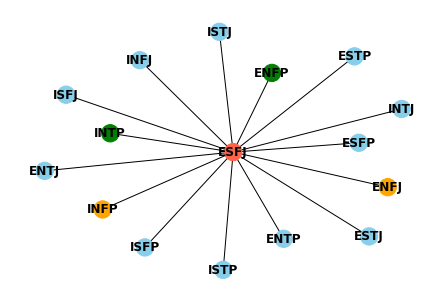

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

## ESFP

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Final Project/ESFP_All_Tweets.csv')
df2 = MBTI[MBTI['type'] == 'ESFP']
Merge = np.concatenate((df1['Text'], df2['posts']), axis = 0)

New = []
for _ in Merge:
    New.append(str(_).lower())

freq = {}
tt1 = 0
tt2 = 0 
tt3 = 0
tt4 = 0
tt5 = 0
tt6 = 0
tt7 = 0
tt8 = 0
tt9 = 0
tt10 = 0
tt11 = 0
tt12 = 0
tt13 = 0
tt14 = 0
tt15 = 0
tt16 = 0

for i in New:
  if 'istj' in i:
    tt1 += 1
  if 'istp' in i:
    tt2 += 1
  if 'isfj' in i:
    tt3 += 1
  if 'isfp' in i:
    tt4 += 1
  if 'infj' in i:
    tt5 += 1
  if 'infp' in i:
    tt6 += 1
  if 'intj' in i:
    tt7 += 1
  if 'intp' in i:
    tt8 += 1
  if 'estp' in i:
    tt9 += 1
  if 'estj' in i:
    tt10 += 1
  if 'esfp' in i:
    tt11 += 1
  if 'esfj' in i:
    tt12 += 1
  if 'enfp' in i:
    tt13 += 1
  if 'enfj' in i:
    tt14 += 1
  if 'entp' in i:
    tt15 += 1
  if 'entj' in i:
    tt16 += 1
  
  freq['istj'] = tt1
  freq['istp'] = tt2 
  freq['isfj'] = tt3 
  freq['isfp'] = tt4 
  freq['infj'] = tt5 
  freq['infp'] = tt6 
  freq['intj'] = tt7 
  freq['intp'] = tt8 
  freq['estp'] = tt9 
  freq['estj'] = tt10 
  freq['esfp'] = tt11 
  freq['esfj'] = tt12 
  freq['enfp'] = tt13
  freq['enfj'] = tt14 
  freq['entp'] = tt15
  freq['entj'] = tt16 

sorted(freq.items(), key = lambda x: x[1], reverse = True)

[('esfp', 20981),
 ('enfp', 2689),
 ('isfp', 2033),
 ('estp', 1954),
 ('intj', 1807),
 ('infp', 1796),
 ('entp', 1550),
 ('intp', 1532),
 ('esfj', 1515),
 ('infj', 1485),
 ('enfj', 1451),
 ('isfj', 1379),
 ('entj', 1303),
 ('istp', 1299),
 ('istj', 1252),
 ('estj', 1112)]

In [ ]:
colors = ['skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue',
          'skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue']

In [ ]:
colors = ['skyblue','skyblue','orange','skyblue','skyblue','skyblue','skyblue','orange',
          'skyblue','skyblue','orange','skyblue','tomato','skyblue','skyblue','skyblue']

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
main_plot("ESFP")

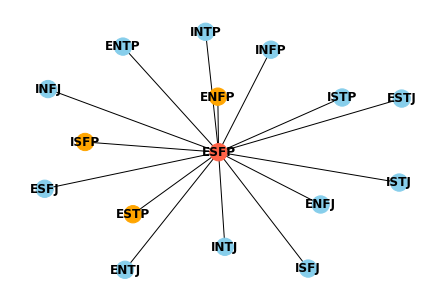

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

In [ ]:
f1 = []
f2 = []
f3 = []
f4 = []
f5 = []
f6 = []
f7 = []
f8 = []
f9 = []
f10 = []
f11 = []
f12 = []
f13 = []
f14 = []
f15 = []
f16 = []

for i in New:
  if 'istj' in i:
    f1.append(i)
  if 'istp' in i:
    f2.append(i)
  if 'isfj' in i:
    f3.append(i)
  if 'isfp' in i:
    f4.append(i)
  if 'infj' in i:
    f5.append(i)
  if 'infp' in i:
    f6.append(i)
  if 'intj' in i:
    f7.append(i)
  if 'intp' in i:
    f8.append(i)
  if 'estp' in i:
    f9.append(i)
  if 'estj' in i:
    f10.append(i)
  if 'esfp' in i:
    f11.append(i)
  if 'esfj' in i:
    f12.append(i)
  if 'enfp' in i:
    f13.append(i)
  if 'enfj' in i:
    f14.append(i)
  if 'entp' in i:
    f15.append(i)
  if 'entj' in i:
    f16.append(i)

dfs = [f1,f2,f3,f4,f5,f6,f7,f8,
       f9,f10,f11,f12,f13,f14,f15,f16]

prop = {}
for i in range(len(dfs)):
  count = 0
  for row in dfs[i]:
    values = sen.polarity_scores(str(row))['compound']
    if values > 0:
        count += 1
  prop[All[i]] = (round(count/len(dfs[i]),2)) * 100

In [ ]:
sorted(prop.items(), key = lambda x: x[1], reverse = True)

[('esfp', 52.0),
 ('enfp', 48.0),
 ('infj', 47.0),
 ('infp', 47.0),
 ('intj', 47.0),
 ('estp', 47.0),
 ('enfj', 47.0),
 ('isfj', 46.0),
 ('intp', 46.0),
 ('esfj', 46.0),
 ('entj', 46.0),
 ('istj', 45.0),
 ('istp', 45.0),
 ('isfp', 45.0),
 ('entp', 45.0),
 ('estj', 44.0)]

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
colors = ['green','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue',
          'skyblue','skyblue','skyblue','skyblue','tomato','skyblue','skyblue','green']

In [ ]:
plot("ESFP")

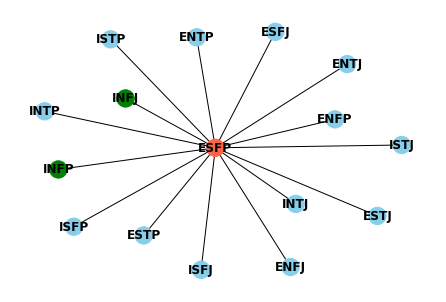

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

## ESTJ

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Final Project/ESTJ_All_Tweets.csv')
df2 = MBTI[MBTI['type'] == 'ESTJ']
Merge = np.concatenate((df1['Text'], df2['posts']), axis = 0)

New = []
for _ in Merge:
    New.append(str(_).lower())

freq = {}
tt1 = 0
tt2 = 0 
tt3 = 0
tt4 = 0
tt5 = 0
tt6 = 0
tt7 = 0
tt8 = 0
tt9 = 0
tt10 = 0
tt11 = 0
tt12 = 0
tt13 = 0
tt14 = 0
tt15 = 0
tt16 = 0

for i in New:
  if 'istj' in i:
    tt1 += 1
  if 'istp' in i:
    tt2 += 1
  if 'isfj' in i:
    tt3 += 1
  if 'isfp' in i:
    tt4 += 1
  if 'infj' in i:
    tt5 += 1
  if 'infp' in i:
    tt6 += 1
  if 'intj' in i:
    tt7 += 1
  if 'intp' in i:
    tt8 += 1
  if 'estp' in i:
    tt9 += 1
  if 'estj' in i:
    tt10 += 1
  if 'esfp' in i:
    tt11 += 1
  if 'esfj' in i:
    tt12 += 1
  if 'enfp' in i:
    tt13 += 1
  if 'enfj' in i:
    tt14 += 1
  if 'entp' in i:
    tt15 += 1
  if 'entj' in i:
    tt16 += 1
  
  freq['istj'] = tt1
  freq['istp'] = tt2 
  freq['isfj'] = tt3 
  freq['isfp'] = tt4 
  freq['infj'] = tt5 
  freq['infp'] = tt6 
  freq['intj'] = tt7 
  freq['intp'] = tt8 
  freq['estp'] = tt9 
  freq['estj'] = tt10 
  freq['esfp'] = tt11 
  freq['esfj'] = tt12 
  freq['enfp'] = tt13
  freq['enfj'] = tt14 
  freq['entp'] = tt15
  freq['entj'] = tt16 

sorted(freq.items(), key = lambda x: x[1], reverse = True)

[('estj', 20554),
 ('entj', 2383),
 ('infp', 2247),
 ('istj', 2101),
 ('esfj', 1814),
 ('intp', 1793),
 ('infj', 1770),
 ('entp', 1758),
 ('estp', 1756),
 ('enfp', 1733),
 ('intj', 1732),
 ('isfj', 1571),
 ('enfj', 1568),
 ('isfp', 1509),
 ('istp', 1492),
 ('esfp', 1473)]

In [ ]:
colors = ['skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue',
          'skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue']

In [ ]:
colors = ['orange','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue',
          'orange','skyblue','skyblue','orange','skyblue','skyblue','tomato','skyblue']

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
main_plot("ESTJ")

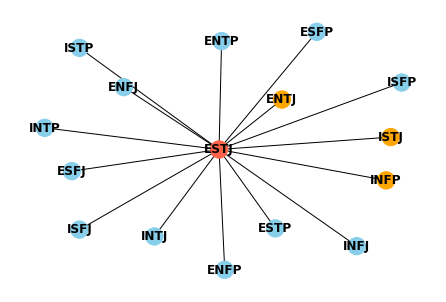

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

In [ ]:
f1 = []
f2 = []
f3 = []
f4 = []
f5 = []
f6 = []
f7 = []
f8 = []
f9 = []
f10 = []
f11 = []
f12 = []
f13 = []
f14 = []
f15 = []
f16 = []

for i in New:
  if 'istj' in i:
    f1.append(i)
  if 'istp' in i:
    f2.append(i)
  if 'isfj' in i:
    f3.append(i)
  if 'isfp' in i:
    f4.append(i)
  if 'infj' in i:
    f5.append(i)
  if 'infp' in i:
    f6.append(i)
  if 'intj' in i:
    f7.append(i)
  if 'intp' in i:
    f8.append(i)
  if 'estp' in i:
    f9.append(i)
  if 'estj' in i:
    f10.append(i)
  if 'esfp' in i:
    f11.append(i)
  if 'esfj' in i:
    f12.append(i)
  if 'enfp' in i:
    f13.append(i)
  if 'enfj' in i:
    f14.append(i)
  if 'entp' in i:
    f15.append(i)
  if 'entj' in i:
    f16.append(i)

dfs = [f1,f2,f3,f4,f5,f6,f7,f8,
       f9,f10,f11,f12,f13,f14,f15,f16]

prop = {}
for i in range(len(dfs)):
  count = 0
  for row in dfs[i]:
    values = sen.polarity_scores(str(row))['compound']
    if values > 0:
        count += 1
  prop[All[i]] = (round(count/len(dfs[i]),2)) * 100

In [ ]:
sorted(prop.items(), key = lambda x: x[1], reverse = True)

[('estj', 56.00000000000001),
 ('infp', 48.0),
 ('enfp', 47.0),
 ('esfj', 46.0),
 ('entj', 46.0),
 ('istj', 45.0),
 ('infj', 45.0),
 ('intj', 45.0),
 ('intp', 45.0),
 ('enfj', 45.0),
 ('entp', 45.0),
 ('isfj', 44.0),
 ('istp', 43.0),
 ('estp', 43.0),
 ('isfp', 42.0),
 ('esfp', 42.0)]

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
colors = ['orange','skyblue','green','skyblue','skyblue','skyblue','skyblue','skyblue',
          'skyblue','skyblue','skyblue','orange','skyblue','green','tomato','skyblue']

In [ ]:
plot("ESTJ")

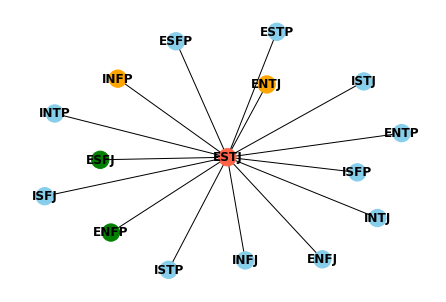

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

## ESTP

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Final Project/ESTP_All_Tweets.csv')
df2 = MBTI[MBTI['type'] == 'ESTP']
Merge = np.concatenate((df1['Text'], df2['posts']), axis = 0)

New = []
for _ in Merge:
    New.append(str(_).lower())

freq = {}
tt1 = 0
tt2 = 0 
tt3 = 0
tt4 = 0
tt5 = 0
tt6 = 0
tt7 = 0
tt8 = 0
tt9 = 0
tt10 = 0
tt11 = 0
tt12 = 0
tt13 = 0
tt14 = 0
tt15 = 0
tt16 = 0

for i in New:
  if 'istj' in i:
    tt1 += 1
  if 'istp' in i:
    tt2 += 1
  if 'isfj' in i:
    tt3 += 1
  if 'isfp' in i:
    tt4 += 1
  if 'infj' in i:
    tt5 += 1
  if 'infp' in i:
    tt6 += 1
  if 'intj' in i:
    tt7 += 1
  if 'intp' in i:
    tt8 += 1
  if 'estp' in i:
    tt9 += 1
  if 'estj' in i:
    tt10 += 1
  if 'esfp' in i:
    tt11 += 1
  if 'esfj' in i:
    tt12 += 1
  if 'enfp' in i:
    tt13 += 1
  if 'enfj' in i:
    tt14 += 1
  if 'entp' in i:
    tt15 += 1
  if 'entj' in i:
    tt16 += 1
  
  freq['istj'] = tt1
  freq['istp'] = tt2 
  freq['isfj'] = tt3 
  freq['isfp'] = tt4 
  freq['infj'] = tt5 
  freq['infp'] = tt6 
  freq['intj'] = tt7 
  freq['intp'] = tt8 
  freq['estp'] = tt9 
  freq['estj'] = tt10 
  freq['esfp'] = tt11 
  freq['esfj'] = tt12 
  freq['enfp'] = tt13
  freq['enfj'] = tt14 
  freq['entp'] = tt15
  freq['entj'] = tt16 

sorted(freq.items(), key = lambda x: x[1], reverse = True)

[('estp', 16096),
 ('entp', 1759),
 ('esfp', 1681),
 ('infp', 1558),
 ('istp', 1517),
 ('intp', 1500),
 ('infj', 1472),
 ('enfp', 1404),
 ('istj', 1301),
 ('isfp', 1152),
 ('entj', 1150),
 ('enfj', 1141),
 ('estj', 1088),
 ('intj', 1081),
 ('isfj', 1069),
 ('esfj', 992)]

In [ ]:
colors = ['skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue',
          'skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue']

In [ ]:
colors = ['orange','skyblue','skyblue','skyblue','skyblue','orange','skyblue','skyblue',
          'skyblue','skyblue','tomato','skyblue','orange','skyblue','skyblue','skyblue']

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
main_plot("ESTP")

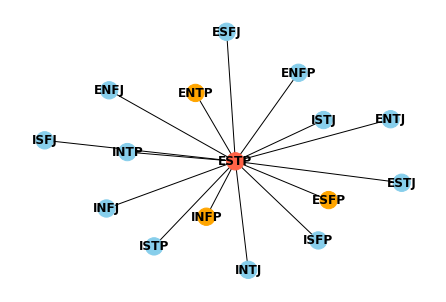

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

In [ ]:
f1 = []
f2 = []
f3 = []
f4 = []
f5 = []
f6 = []
f7 = []
f8 = []
f9 = []
f10 = []
f11 = []
f12 = []
f13 = []
f14 = []
f15 = []
f16 = []

for i in New:
  if 'istj' in i:
    f1.append(i)
  if 'istp' in i:
    f2.append(i)
  if 'isfj' in i:
    f3.append(i)
  if 'isfp' in i:
    f4.append(i)
  if 'infj' in i:
    f5.append(i)
  if 'infp' in i:
    f6.append(i)
  if 'intj' in i:
    f7.append(i)
  if 'intp' in i:
    f8.append(i)
  if 'estp' in i:
    f9.append(i)
  if 'estj' in i:
    f10.append(i)
  if 'esfp' in i:
    f11.append(i)
  if 'esfj' in i:
    f12.append(i)
  if 'enfp' in i:
    f13.append(i)
  if 'enfj' in i:
    f14.append(i)
  if 'entp' in i:
    f15.append(i)
  if 'entj' in i:
    f16.append(i)

dfs = [f1,f2,f3,f4,f5,f6,f7,f8,
       f9,f10,f11,f12,f13,f14,f15,f16]

prop = {}
for i in range(len(dfs)):
  count = 0
  for row in dfs[i]:
    values = sen.polarity_scores(str(row))['compound']
    if values > 0:
        count += 1
  prop[All[i]] = (round(count/len(dfs[i]),2)) * 100

In [ ]:
sorted(prop.items(), key = lambda x: x[1], reverse = True)

[('istj', 55.00000000000001),
 ('estp', 51.0),
 ('infj', 50.0),
 ('isfj', 48.0),
 ('enfp', 48.0),
 ('enfj', 48.0),
 ('esfp', 47.0),
 ('entp', 47.0),
 ('entj', 47.0),
 ('isfp', 46.0),
 ('infp', 46.0),
 ('intj', 46.0),
 ('intp', 46.0),
 ('estj', 46.0),
 ('esfj', 46.0),
 ('istp', 45.0)]

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
colors = ['skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue',
          'green','skyblue','tomato','skyblue','skyblue','skyblue','skyblue','green']

In [ ]:
plot("ESTP")

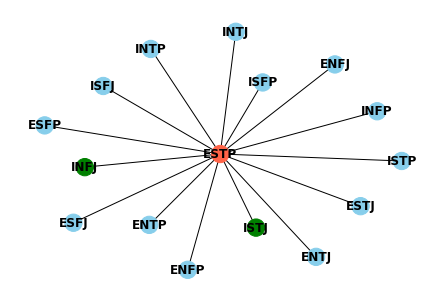

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

## INFJ

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Final Project/INFJ_All_Tweets.csv')
df2 = MBTI[MBTI['type'] == 'INFJ']
Merge = np.concatenate((df1['Text'], df2['posts']), axis = 0)

New = []
for _ in Merge:
    New.append(str(_).lower())

freq = {}
tt1 = 0
tt2 = 0 
tt3 = 0
tt4 = 0
tt5 = 0
tt6 = 0
tt7 = 0
tt8 = 0
tt9 = 0
tt10 = 0
tt11 = 0
tt12 = 0
tt13 = 0
tt14 = 0
tt15 = 0
tt16 = 0

for i in New:
  if 'istj' in i:
    tt1 += 1
  if 'istp' in i:
    tt2 += 1
  if 'isfj' in i:
    tt3 += 1
  if 'isfp' in i:
    tt4 += 1
  if 'infj' in i:
    tt5 += 1
  if 'infp' in i:
    tt6 += 1
  if 'intj' in i:
    tt7 += 1
  if 'intp' in i:
    tt8 += 1
  if 'estp' in i:
    tt9 += 1
  if 'estj' in i:
    tt10 += 1
  if 'esfp' in i:
    tt11 += 1
  if 'esfj' in i:
    tt12 += 1
  if 'enfp' in i:
    tt13 += 1
  if 'enfj' in i:
    tt14 += 1
  if 'entp' in i:
    tt15 += 1
  if 'entj' in i:
    tt16 += 1
  
  freq['istj'] = tt1
  freq['istp'] = tt2 
  freq['isfj'] = tt3 
  freq['isfp'] = tt4 
  freq['infj'] = tt5 
  freq['infp'] = tt6 
  freq['intj'] = tt7 
  freq['intp'] = tt8 
  freq['estp'] = tt9 
  freq['estj'] = tt10 
  freq['esfp'] = tt11 
  freq['esfj'] = tt12 
  freq['enfp'] = tt13
  freq['enfj'] = tt14 
  freq['entp'] = tt15
  freq['entj'] = tt16 

sorted(freq.items(), key = lambda x: x[1], reverse = True)

[('infj', 26278),
 ('infp', 2427),
 ('intj', 1597),
 ('enfp', 1068),
 ('intp', 953),
 ('enfj', 908),
 ('entp', 832),
 ('isfj', 734),
 ('isfp', 551),
 ('istj', 524),
 ('istp', 469),
 ('estp', 455),
 ('entj', 427),
 ('esfp', 398),
 ('esfj', 365),
 ('estj', 340)]

In [ ]:
colors = ['skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue',
          'skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue']

In [ ]:
colors = ['orange','orange','orange','skyblue','skyblue','skyblue','skyblue','skyblue',
          'skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','tomato']

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
main_plot("INFJ")

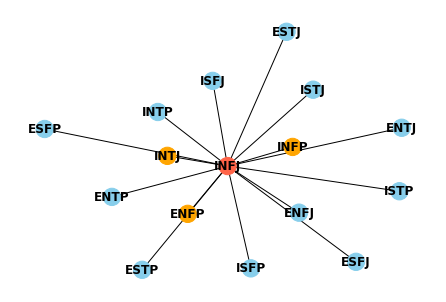

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

In [ ]:
f1 = []
f2 = []
f3 = []
f4 = []
f5 = []
f6 = []
f7 = []
f8 = []
f9 = []
f10 = []
f11 = []
f12 = []
f13 = []
f14 = []
f15 = []
f16 = []

for i in New:
  if 'istj' in i:
    f1.append(i)
  if 'istp' in i:
    f2.append(i)
  if 'isfj' in i:
    f3.append(i)
  if 'isfp' in i:
    f4.append(i)
  if 'infj' in i:
    f5.append(i)
  if 'infp' in i:
    f6.append(i)
  if 'intj' in i:
    f7.append(i)
  if 'intp' in i:
    f8.append(i)
  if 'estp' in i:
    f9.append(i)
  if 'estj' in i:
    f10.append(i)
  if 'esfp' in i:
    f11.append(i)
  if 'esfj' in i:
    f12.append(i)
  if 'enfp' in i:
    f13.append(i)
  if 'enfj' in i:
    f14.append(i)
  if 'entp' in i:
    f15.append(i)
  if 'entj' in i:
    f16.append(i)

dfs = [f1,f2,f3,f4,f5,f6,f7,f8,
       f9,f10,f11,f12,f13,f14,f15,f16]

prop = {}
for i in range(len(dfs)):
  count = 0
  for row in dfs[i]:
    values = sen.polarity_scores(str(row))['compound']
    if values > 0:
        count += 1
  prop[All[i]] = (round(count/len(dfs[i]),2)) * 100

In [ ]:
sorted(prop.items(), key = lambda x: x[1], reverse = True)

[('esfj', 81.0),
 ('estp', 80.0),
 ('estj', 80.0),
 ('esfp', 80.0),
 ('istj', 79.0),
 ('entp', 78.0),
 ('istp', 77.0),
 ('entj', 77.0),
 ('enfp', 76.0),
 ('isfp', 75.0),
 ('isfj', 73.0),
 ('enfj', 73.0),
 ('intp', 72.0),
 ('intj', 69.0),
 ('infp', 63.0),
 ('infj', 51.0)]

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
colors = ['skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue',
          'skyblue','skyblue','green','skyblue','green','green','green','tomato']

In [ ]:
plot("INFJ")

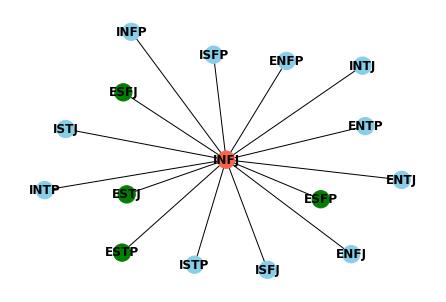

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

## INFP

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Final Project/INFP_All_Tweets.csv')
df2 = MBTI[MBTI['type'] == 'INFP']
Merge = np.concatenate((df1['Text'], df2['posts']), axis = 0)

New = []
for _ in Merge:
    New.append(str(_).lower())

freq = {}
tt1 = 0
tt2 = 0 
tt3 = 0
tt4 = 0
tt5 = 0
tt6 = 0
tt7 = 0
tt8 = 0
tt9 = 0
tt10 = 0
tt11 = 0
tt12 = 0
tt13 = 0
tt14 = 0
tt15 = 0
tt16 = 0

for i in New:
  if 'istj' in i:
    tt1 += 1
  if 'istp' in i:
    tt2 += 1
  if 'isfj' in i:
    tt3 += 1
  if 'isfp' in i:
    tt4 += 1
  if 'infj' in i:
    tt5 += 1
  if 'infp' in i:
    tt6 += 1
  if 'intj' in i:
    tt7 += 1
  if 'intp' in i:
    tt8 += 1
  if 'estp' in i:
    tt9 += 1
  if 'estj' in i:
    tt10 += 1
  if 'esfp' in i:
    tt11 += 1
  if 'esfj' in i:
    tt12 += 1
  if 'enfp' in i:
    tt13 += 1
  if 'enfj' in i:
    tt14 += 1
  if 'entp' in i:
    tt15 += 1
  if 'entj' in i:
    tt16 += 1
  
  freq['istj'] = tt1
  freq['istp'] = tt2 
  freq['isfj'] = tt3 
  freq['isfp'] = tt4 
  freq['infj'] = tt5 
  freq['infp'] = tt6 
  freq['intj'] = tt7 
  freq['intp'] = tt8 
  freq['estp'] = tt9 
  freq['estj'] = tt10 
  freq['esfp'] = tt11 
  freq['esfj'] = tt12 
  freq['enfp'] = tt13
  freq['enfj'] = tt14 
  freq['entp'] = tt15
  freq['entj'] = tt16 

sorted(freq.items(), key = lambda x: x[1], reverse = True)

[('infp', 26125),
 ('infj', 2468),
 ('enfp', 1891),
 ('intp', 1713),
 ('intj', 1154),
 ('isfp', 1054),
 ('enfj', 826),
 ('entp', 729),
 ('isfj', 648),
 ('istj', 592),
 ('entj', 540),
 ('estj', 538),
 ('istp', 492),
 ('esfp', 460),
 ('esfj', 449),
 ('estp', 418)]

In [ ]:
colors = ['skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue',
          'skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue']

In [ ]:
colors = ['tomato','skyblue','orange','orange','skyblue','skyblue','skyblue','skyblue',
          'skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','orange']

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
main_plot("INFP")

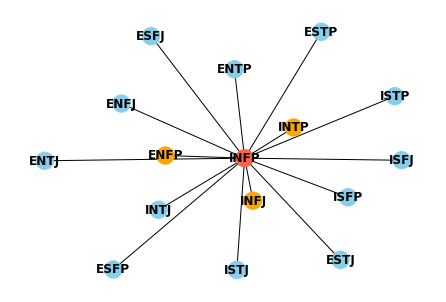

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

In [ ]:
f1 = []
f2 = []
f3 = []
f4 = []
f5 = []
f6 = []
f7 = []
f8 = []
f9 = []
f10 = []
f11 = []
f12 = []
f13 = []
f14 = []
f15 = []
f16 = []

for i in New:
  if 'istj' in i:
    f1.append(i)
  if 'istp' in i:
    f2.append(i)
  if 'isfj' in i:
    f3.append(i)
  if 'isfp' in i:
    f4.append(i)
  if 'infj' in i:
    f5.append(i)
  if 'infp' in i:
    f6.append(i)
  if 'intj' in i:
    f7.append(i)
  if 'intp' in i:
    f8.append(i)
  if 'estp' in i:
    f9.append(i)
  if 'estj' in i:
    f10.append(i)
  if 'esfp' in i:
    f11.append(i)
  if 'esfj' in i:
    f12.append(i)
  if 'enfp' in i:
    f13.append(i)
  if 'enfj' in i:
    f14.append(i)
  if 'entp' in i:
    f15.append(i)
  if 'entj' in i:
    f16.append(i)

dfs = [f1,f2,f3,f4,f5,f6,f7,f8,
       f9,f10,f11,f12,f13,f14,f15,f16]

prop = {}
for i in range(len(dfs)):
  count = 0
  for row in dfs[i]:
    values = sen.polarity_scores(str(row))['compound']
    if values > 0:
        count += 1
  prop[All[i]] = (round(count/len(dfs[i]),2)) * 100

In [ ]:
sorted(prop.items(), key = lambda x: x[1], reverse = True)

[('estj', 81.0),
 ('istj', 80.0),
 ('estp', 78.0),
 ('esfj', 78.0),
 ('enfj', 78.0),
 ('entj', 76.0),
 ('esfp', 75.0),
 ('isfj', 73.0),
 ('intj', 73.0),
 ('istp', 70.0),
 ('entp', 69.0),
 ('enfp', 67.0),
 ('isfp', 65.0),
 ('intp', 63.0),
 ('infj', 62.0),
 ('infp', 49.0)]

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
colors = ['tomato','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue',
          'green','skyblue','skyblue','skyblue','skyblue','skyblue','green','skyblue']

In [ ]:
plot("INFP")

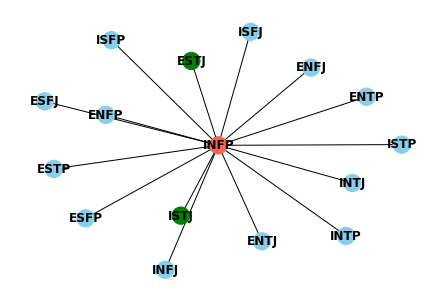

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

## INTJ

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Final Project/INTJ_All_Tweets.csv')
df2 = MBTI[MBTI['type'] == 'INTJ']
Merge = np.concatenate((df1['Text'], df2['posts']), axis = 0)

New = []
for _ in Merge:
    New.append(str(_).lower())

freq = {}
tt1 = 0
tt2 = 0 
tt3 = 0
tt4 = 0
tt5 = 0
tt6 = 0
tt7 = 0
tt8 = 0
tt9 = 0
tt10 = 0
tt11 = 0
tt12 = 0
tt13 = 0
tt14 = 0
tt15 = 0
tt16 = 0

for i in New:
  if 'istj' in i:
    tt1 += 1
  if 'istp' in i:
    tt2 += 1
  if 'isfj' in i:
    tt3 += 1
  if 'isfp' in i:
    tt4 += 1
  if 'infj' in i:
    tt5 += 1
  if 'infp' in i:
    tt6 += 1
  if 'intj' in i:
    tt7 += 1
  if 'intp' in i:
    tt8 += 1
  if 'estp' in i:
    tt9 += 1
  if 'estj' in i:
    tt10 += 1
  if 'esfp' in i:
    tt11 += 1
  if 'esfj' in i:
    tt12 += 1
  if 'enfp' in i:
    tt13 += 1
  if 'enfj' in i:
    tt14 += 1
  if 'entp' in i:
    tt15 += 1
  if 'entj' in i:
    tt16 += 1
  
  freq['istj'] = tt1
  freq['istp'] = tt2 
  freq['isfj'] = tt3 
  freq['isfp'] = tt4 
  freq['infj'] = tt5 
  freq['infp'] = tt6 
  freq['intj'] = tt7 
  freq['intp'] = tt8 
  freq['estp'] = tt9 
  freq['estj'] = tt10 
  freq['esfp'] = tt11 
  freq['esfj'] = tt12 
  freq['enfp'] = tt13
  freq['enfj'] = tt14 
  freq['entp'] = tt15
  freq['entj'] = tt16 

sorted(freq.items(), key = lambda x: x[1], reverse = True)

[('intj', 25981),
 ('infj', 2143),
 ('intp', 2127),
 ('infp', 1407),
 ('enfp', 1173),
 ('entj', 1064),
 ('entp', 992),
 ('istj', 947),
 ('esfp', 629),
 ('isfp', 628),
 ('istp', 622),
 ('isfj', 620),
 ('enfj', 585),
 ('esfj', 476),
 ('estp', 438),
 ('estj', 413)]

In [ ]:
colors = ['skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue',
          'skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue']

In [ ]:
colors = ['orange','tomato','skyblue','orange','skyblue','skyblue','skyblue','skyblue',
          'skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','orange']

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
main_plot("INTJ")

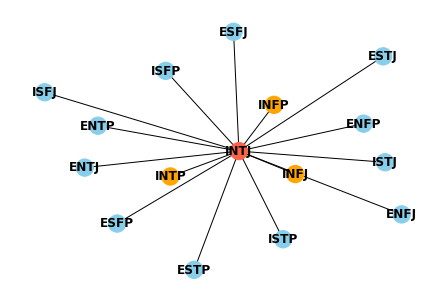

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

In [ ]:
f1 = []
f2 = []
f3 = []
f4 = []
f5 = []
f6 = []
f7 = []
f8 = []
f9 = []
f10 = []
f11 = []
f12 = []
f13 = []
f14 = []
f15 = []
f16 = []

for i in New:
  if 'istj' in i:
    f1.append(i)
  if 'istp' in i:
    f2.append(i)
  if 'isfj' in i:
    f3.append(i)
  if 'isfp' in i:
    f4.append(i)
  if 'infj' in i:
    f5.append(i)
  if 'infp' in i:
    f6.append(i)
  if 'intj' in i:
    f7.append(i)
  if 'intp' in i:
    f8.append(i)
  if 'estp' in i:
    f9.append(i)
  if 'estj' in i:
    f10.append(i)
  if 'esfp' in i:
    f11.append(i)
  if 'esfj' in i:
    f12.append(i)
  if 'enfp' in i:
    f13.append(i)
  if 'enfj' in i:
    f14.append(i)
  if 'entp' in i:
    f15.append(i)
  if 'entj' in i:
    f16.append(i)

dfs = [f1,f2,f3,f4,f5,f6,f7,f8,
       f9,f10,f11,f12,f13,f14,f15,f16]

prop = {}
for i in range(len(dfs)):
  count = 0
  for row in dfs[i]:
    values = sen.polarity_scores(str(row))['compound']
    if values > 0:
        count += 1
  prop[All[i]] = (round(count/len(dfs[i]),2)) * 100

In [ ]:
sorted(prop.items(), key = lambda x: x[1], reverse = True)

[('enfp', 67.0),
 ('esfj', 63.0),
 ('esfp', 62.0),
 ('entp', 60.0),
 ('infp', 59.0),
 ('enfj', 59.0),
 ('istj', 57.99999999999999),
 ('istp', 57.99999999999999),
 ('estp', 57.99999999999999),
 ('entj', 57.99999999999999),
 ('isfj', 56.99999999999999),
 ('isfp', 56.99999999999999),
 ('estj', 56.99999999999999),
 ('infj', 56.00000000000001),
 ('intp', 54.0),
 ('intj', 48.0)]

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
colors = ['skyblue','tomato','green','skyblue','skyblue','skyblue','skyblue','skyblue',
          'skyblue','skyblue','skyblue','skyblue','green','green','skyblue','skyblue']

In [ ]:
plot("INTJ")

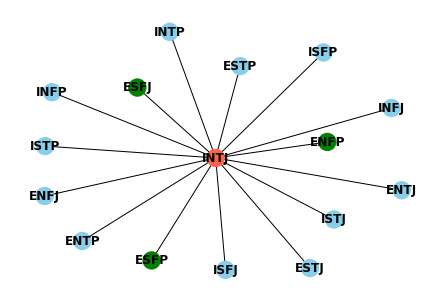

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

## INTP

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Final Project/INTP_All_Tweets.csv')
df2 = MBTI[MBTI['type'] == 'INTP']
Merge = np.concatenate((df1['Text'], df2['posts']), axis = 0)

New = []
for _ in Merge:
    New.append(str(_).lower())

freq = {}
tt1 = 0
tt2 = 0 
tt3 = 0
tt4 = 0
tt5 = 0
tt6 = 0
tt7 = 0
tt8 = 0
tt9 = 0
tt10 = 0
tt11 = 0
tt12 = 0
tt13 = 0
tt14 = 0
tt15 = 0
tt16 = 0

for i in New:
  if 'istj' in i:
    tt1 += 1
  if 'istp' in i:
    tt2 += 1
  if 'isfj' in i:
    tt3 += 1
  if 'isfp' in i:
    tt4 += 1
  if 'infj' in i:
    tt5 += 1
  if 'infp' in i:
    tt6 += 1
  if 'intj' in i:
    tt7 += 1
  if 'intp' in i:
    tt8 += 1
  if 'estp' in i:
    tt9 += 1
  if 'estj' in i:
    tt10 += 1
  if 'esfp' in i:
    tt11 += 1
  if 'esfj' in i:
    tt12 += 1
  if 'enfp' in i:
    tt13 += 1
  if 'enfj' in i:
    tt14 += 1
  if 'entp' in i:
    tt15 += 1
  if 'entj' in i:
    tt16 += 1
  
  freq['istj'] = tt1
  freq['istp'] = tt2 
  freq['isfj'] = tt3 
  freq['isfp'] = tt4 
  freq['infj'] = tt5 
  freq['infp'] = tt6 
  freq['intj'] = tt7 
  freq['intp'] = tt8 
  freq['estp'] = tt9 
  freq['estj'] = tt10 
  freq['esfp'] = tt11 
  freq['esfj'] = tt12 
  freq['enfp'] = tt13
  freq['enfj'] = tt14 
  freq['entp'] = tt15
  freq['entj'] = tt16 

sorted(freq.items(), key = lambda x: x[1], reverse = True)

[('intp', 18991),
 ('infp', 2225),
 ('intj', 1907),
 ('entp', 1441),
 ('infj', 1170),
 ('enfp', 880),
 ('istp', 841),
 ('entj', 684),
 ('isfp', 672),
 ('isfj', 654),
 ('istj', 622),
 ('esfj', 556),
 ('enfj', 532),
 ('esfp', 484),
 ('estp', 446),
 ('estj', 397)]

In [ ]:
colors = ['skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue',
          'skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue']

In [ ]:
colors = ['orange','orange','skyblue','tomato','skyblue','orange','skyblue','skyblue',
          'skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue']

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
main_plot("INTP")

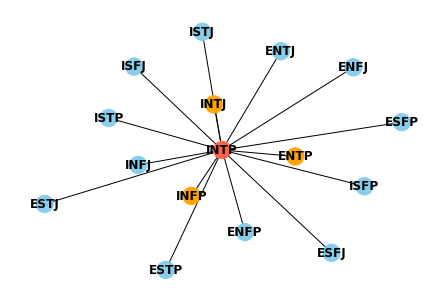

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

In [ ]:
f1 = []
f2 = []
f3 = []
f4 = []
f5 = []
f6 = []
f7 = []
f8 = []
f9 = []
f10 = []
f11 = []
f12 = []
f13 = []
f14 = []
f15 = []
f16 = []

for i in New:
  if 'istj' in i:
    f1.append(i)
  if 'istp' in i:
    f2.append(i)
  if 'isfj' in i:
    f3.append(i)
  if 'isfp' in i:
    f4.append(i)
  if 'infj' in i:
    f5.append(i)
  if 'infp' in i:
    f6.append(i)
  if 'intj' in i:
    f7.append(i)
  if 'intp' in i:
    f8.append(i)
  if 'estp' in i:
    f9.append(i)
  if 'estj' in i:
    f10.append(i)
  if 'esfp' in i:
    f11.append(i)
  if 'esfj' in i:
    f12.append(i)
  if 'enfp' in i:
    f13.append(i)
  if 'enfj' in i:
    f14.append(i)
  if 'entp' in i:
    f15.append(i)
  if 'entj' in i:
    f16.append(i)

dfs = [f1,f2,f3,f4,f5,f6,f7,f8,
       f9,f10,f11,f12,f13,f14,f15,f16]

prop = {}
for i in range(len(dfs)):
  count = 0
  for row in dfs[i]:
    values = sen.polarity_scores(str(row))['compound']
    if values > 0:
        count += 1
  prop[All[i]] = (round(count/len(dfs[i]),2)) * 100

In [ ]:
sorted(prop.items(), key = lambda x: x[1], reverse = True)

[('esfj', 68.0),
 ('entj', 66.0),
 ('estj', 65.0),
 ('enfp', 65.0),
 ('istj', 64.0),
 ('enfj', 64.0),
 ('isfj', 63.0),
 ('infj', 63.0),
 ('estp', 63.0),
 ('esfp', 63.0),
 ('intj', 57.99999999999999),
 ('entp', 57.99999999999999),
 ('istp', 56.99999999999999),
 ('isfp', 56.99999999999999),
 ('infp', 55.00000000000001),
 ('intp', 45.0)]

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
colors = ['skyblue','skyblue','green','tomato','skyblue','skyblue','skyblue','skyblue',
          'skyblue','skyblue','skyblue','green','skyblue','green','green','skyblue']

In [ ]:
plot("INTP")

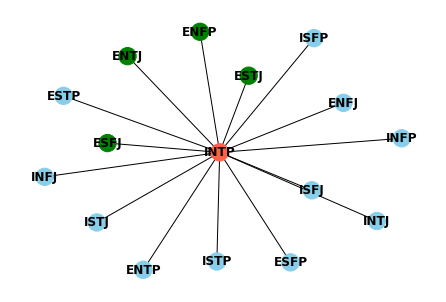

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

## ISFJ

In [16]:
df1 = pd.read_csv('/content/drive/MyDrive/Final Project/ISFJ_All_Tweets.csv')
df2 = MBTI[MBTI['type'] == 'ISFJ']
Merge = np.concatenate((df1['Text'], df2['posts']), axis = 0)

New = []
for _ in Merge:
    New.append(str(_).lower())

freq = {}
tt1 = 0
tt2 = 0 
tt3 = 0
tt4 = 0
tt5 = 0
tt6 = 0
tt7 = 0
tt8 = 0
tt9 = 0
tt10 = 0
tt11 = 0
tt12 = 0
tt13 = 0
tt14 = 0
tt15 = 0
tt16 = 0

for i in New:
  if 'istj' in i:
    tt1 += 1
  if 'istp' in i:
    tt2 += 1
  if 'isfj' in i:
    tt3 += 1
  if 'isfp' in i:
    tt4 += 1
  if 'infj' in i:
    tt5 += 1
  if 'infp' in i:
    tt6 += 1
  if 'intj' in i:
    tt7 += 1
  if 'intp' in i:
    tt8 += 1
  if 'estp' in i:
    tt9 += 1
  if 'estj' in i:
    tt10 += 1
  if 'esfp' in i:
    tt11 += 1
  if 'esfj' in i:
    tt12 += 1
  if 'enfp' in i:
    tt13 += 1
  if 'enfj' in i:
    tt14 += 1
  if 'entp' in i:
    tt15 += 1
  if 'entj' in i:
    tt16 += 1
  
  freq['istj'] = tt1
  freq['istp'] = tt2 
  freq['isfj'] = tt3 
  freq['isfp'] = tt4 
  freq['infj'] = tt5 
  freq['infp'] = tt6 
  freq['intj'] = tt7 
  freq['intp'] = tt8 
  freq['estp'] = tt9 
  freq['estj'] = tt10 
  freq['esfp'] = tt11 
  freq['esfj'] = tt12 
  freq['enfp'] = tt13
  freq['enfj'] = tt14 
  freq['entp'] = tt15
  freq['entj'] = tt16 

sorted(freq.items(), key = lambda x: x[1], reverse = True)

[('isfj', 22883),
 ('infj', 2776),
 ('infp', 2124),
 ('isfp', 1661),
 ('istj', 1659),
 ('intp', 1405),
 ('intj', 1361),
 ('esfj', 1322),
 ('entp', 1076),
 ('istp', 1063),
 ('enfp', 1024),
 ('enfj', 969),
 ('esfp', 871),
 ('estj', 746),
 ('estp', 743),
 ('entj', 743)]

In [ ]:
colors = ['skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue',
          'skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue']

In [23]:
colors = ['orange','skyblue','skyblue','skyblue','skyblue','skyblue','tomato','orange',
          'skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','orange']

In [24]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [25]:
main_plot("ISFJ")

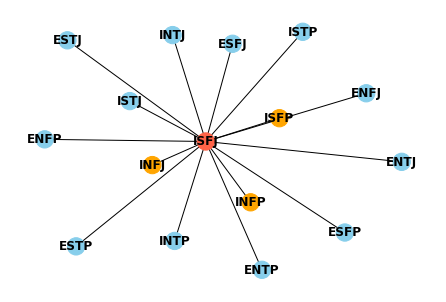

In [26]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

In [ ]:
f1 = []
f2 = []
f3 = []
f4 = []
f5 = []
f6 = []
f7 = []
f8 = []
f9 = []
f10 = []
f11 = []
f12 = []
f13 = []
f14 = []
f15 = []
f16 = []

for i in New:
  if 'istj' in i:
    f1.append(i)
  if 'istp' in i:
    f2.append(i)
  if 'isfj' in i:
    f3.append(i)
  if 'isfp' in i:
    f4.append(i)
  if 'infj' in i:
    f5.append(i)
  if 'infp' in i:
    f6.append(i)
  if 'intj' in i:
    f7.append(i)
  if 'intp' in i:
    f8.append(i)
  if 'estp' in i:
    f9.append(i)
  if 'estj' in i:
    f10.append(i)
  if 'esfp' in i:
    f11.append(i)
  if 'esfj' in i:
    f12.append(i)
  if 'enfp' in i:
    f13.append(i)
  if 'enfj' in i:
    f14.append(i)
  if 'entp' in i:
    f15.append(i)
  if 'entj' in i:
    f16.append(i)

dfs = [f1,f2,f3,f4,f5,f6,f7,f8,
       f9,f10,f11,f12,f13,f14,f15,f16]

prop = {}
for i in range(len(dfs)):
  count = 0
  for row in dfs[i]:
    values = sen.polarity_scores(str(row))['compound']
    if values > 0:
        count += 1
  prop[All[i]] = (round(count/len(dfs[i]),2)) * 100

In [ ]:
sorted(prop.items(), key = lambda x: x[1], reverse = True)

[('intp', 51.0),
 ('istj', 50.0),
 ('enfp', 50.0),
 ('entp', 50.0),
 ('istp', 49.0),
 ('isfj', 49.0),
 ('infj', 49.0),
 ('intj', 49.0),
 ('enfj', 49.0),
 ('infp', 48.0),
 ('estp', 48.0),
 ('esfp', 48.0),
 ('esfj', 48.0),
 ('estj', 47.0),
 ('entj', 47.0),
 ('isfp', 46.0)]

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
colors = ['skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','tomato','skyblue',
          'green','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue']

In [ ]:
plot("ISFJ")

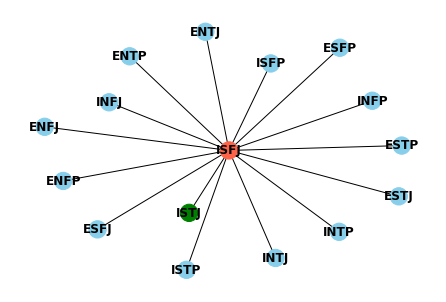

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

## ISFP

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Final Project/ISFP_All_Tweets.csv')
df2 = MBTI[MBTI['type'] == 'ISFP']
Merge = np.concatenate((df1['Text'], df2['posts']), axis = 0)

New = []
for _ in Merge:
    New.append(str(_).lower())

freq = {}
tt1 = 0
tt2 = 0 
tt3 = 0
tt4 = 0
tt5 = 0
tt6 = 0
tt7 = 0
tt8 = 0
tt9 = 0
tt10 = 0
tt11 = 0
tt12 = 0
tt13 = 0
tt14 = 0
tt15 = 0
tt16 = 0

for i in New:
  if 'istj' in i:
    tt1 += 1
  if 'istp' in i:
    tt2 += 1
  if 'isfj' in i:
    tt3 += 1
  if 'isfp' in i:
    tt4 += 1
  if 'infj' in i:
    tt5 += 1
  if 'infp' in i:
    tt6 += 1
  if 'intj' in i:
    tt7 += 1
  if 'intp' in i:
    tt8 += 1
  if 'estp' in i:
    tt9 += 1
  if 'estj' in i:
    tt10 += 1
  if 'esfp' in i:
    tt11 += 1
  if 'esfj' in i:
    tt12 += 1
  if 'enfp' in i:
    tt13 += 1
  if 'enfj' in i:
    tt14 += 1
  if 'entp' in i:
    tt15 += 1
  if 'entj' in i:
    tt16 += 1
  
  freq['istj'] = tt1
  freq['istp'] = tt2 
  freq['isfj'] = tt3 
  freq['isfp'] = tt4 
  freq['infj'] = tt5 
  freq['infp'] = tt6 
  freq['intj'] = tt7 
  freq['intp'] = tt8 
  freq['estp'] = tt9 
  freq['estj'] = tt10 
  freq['esfp'] = tt11 
  freq['esfj'] = tt12 
  freq['enfp'] = tt13
  freq['enfj'] = tt14 
  freq['entp'] = tt15
  freq['entj'] = tt16 

sorted(freq.items(), key = lambda x: x[1], reverse = True)

[('isfp', 23654),
 ('infp', 3917),
 ('intp', 1904),
 ('infj', 1871),
 ('istp', 1697),
 ('isfj', 1597),
 ('intj', 1437),
 ('enfp', 1427),
 ('esfp', 1399),
 ('istj', 1176),
 ('enfj', 1077),
 ('entp', 984),
 ('entj', 955),
 ('esfj', 922),
 ('estp', 900),
 ('estj', 756)]

In [ ]:
colors = ['skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue',
          'skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue']

In [ ]:
colors = ['orange','skyblue','skyblue','orange','skyblue','skyblue','skyblue','tomato',
          'skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','orange']

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
main_plot("ISFP")

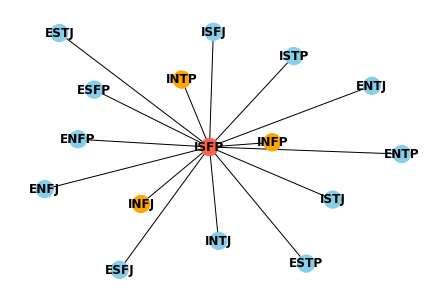

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

In [ ]:
f1 = []
f2 = []
f3 = []
f4 = []
f5 = []
f6 = []
f7 = []
f8 = []
f9 = []
f10 = []
f11 = []
f12 = []
f13 = []
f14 = []
f15 = []
f16 = []

for i in New:
  if 'istj' in i:
    f1.append(i)
  if 'istp' in i:
    f2.append(i)
  if 'isfj' in i:
    f3.append(i)
  if 'isfp' in i:
    f4.append(i)
  if 'infj' in i:
    f5.append(i)
  if 'infp' in i:
    f6.append(i)
  if 'intj' in i:
    f7.append(i)
  if 'intp' in i:
    f8.append(i)
  if 'estp' in i:
    f9.append(i)
  if 'estj' in i:
    f10.append(i)
  if 'esfp' in i:
    f11.append(i)
  if 'esfj' in i:
    f12.append(i)
  if 'enfp' in i:
    f13.append(i)
  if 'enfj' in i:
    f14.append(i)
  if 'entp' in i:
    f15.append(i)
  if 'entj' in i:
    f16.append(i)

dfs = [f1,f2,f3,f4,f5,f6,f7,f8,
       f9,f10,f11,f12,f13,f14,f15,f16]

prop = {}
for i in range(len(dfs)):
  count = 0
  for row in dfs[i]:
    values = sen.polarity_scores(str(row))['compound']
    if values > 0:
        count += 1
  prop[All[i]] = (round(count/len(dfs[i]),2)) * 100

In [ ]:
sorted(prop.items(), key = lambda x: x[1], reverse = True)

[('infj', 52.0),
 ('intj', 52.0),
 ('enfj', 51.0),
 ('istj', 50.0),
 ('isfj', 50.0),
 ('infp', 50.0),
 ('enfp', 50.0),
 ('istp', 49.0),
 ('entj', 49.0),
 ('esfj', 48.0),
 ('intp', 47.0),
 ('estp', 47.0),
 ('esfp', 47.0),
 ('isfp', 46.0),
 ('estj', 46.0),
 ('entp', 46.0)]

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
colors = ['skyblue','green','skyblue','skyblue','skyblue','skyblue','skyblue','tomato',
          'skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','orange']

In [ ]:
plot("ISFP")

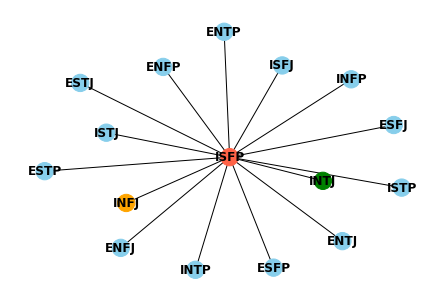

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

## ISTJ

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Final Project/ISTJ_All_Tweets.csv')
df2 = MBTI[MBTI['type'] == 'ISTJ']
Merge = np.concatenate((df1['Text'], df2['posts']), axis = 0)

New = []
for _ in Merge:
    New.append(str(_).lower())

freq = {}
tt1 = 0
tt2 = 0 
tt3 = 0
tt4 = 0
tt5 = 0
tt6 = 0
tt7 = 0
tt8 = 0
tt9 = 0
tt10 = 0
tt11 = 0
tt12 = 0
tt13 = 0
tt14 = 0
tt15 = 0
tt16 = 0

for i in New:
  if 'istj' in i:
    tt1 += 1
  if 'istp' in i:
    tt2 += 1
  if 'isfj' in i:
    tt3 += 1
  if 'isfp' in i:
    tt4 += 1
  if 'infj' in i:
    tt5 += 1
  if 'infp' in i:
    tt6 += 1
  if 'intj' in i:
    tt7 += 1
  if 'intp' in i:
    tt8 += 1
  if 'estp' in i:
    tt9 += 1
  if 'estj' in i:
    tt10 += 1
  if 'esfp' in i:
    tt11 += 1
  if 'esfj' in i:
    tt12 += 1
  if 'enfp' in i:
    tt13 += 1
  if 'enfj' in i:
    tt14 += 1
  if 'entp' in i:
    tt15 += 1
  if 'entj' in i:
    tt16 += 1
  
  freq['istj'] = tt1
  freq['istp'] = tt2 
  freq['isfj'] = tt3 
  freq['isfp'] = tt4 
  freq['infj'] = tt5 
  freq['infp'] = tt6 
  freq['intj'] = tt7 
  freq['intp'] = tt8 
  freq['estp'] = tt9 
  freq['estj'] = tt10 
  freq['esfp'] = tt11 
  freq['esfj'] = tt12 
  freq['enfp'] = tt13
  freq['enfj'] = tt14 
  freq['entp'] = tt15
  freq['entj'] = tt16 

sorted(freq.items(), key = lambda x: x[1], reverse = True)

[('istj', 23032),
 ('intj', 2906),
 ('isfj', 2173),
 ('infp', 2087),
 ('infj', 1986),
 ('intp', 1977),
 ('istp', 1866),
 ('enfp', 1819),
 ('isfp', 1503),
 ('estj', 1434),
 ('estp', 1363),
 ('entp', 1281),
 ('entj', 1203),
 ('esfp', 1153),
 ('esfj', 1107),
 ('enfj', 1105)]

In [ ]:
colors = ['skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue',
          'skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue']

In [ ]:
colors = ['orange','orange','skyblue','skyblue','skyblue','skyblue','orange','skyblue',
          'tomato','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue']

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
main_plot("ISTJ")

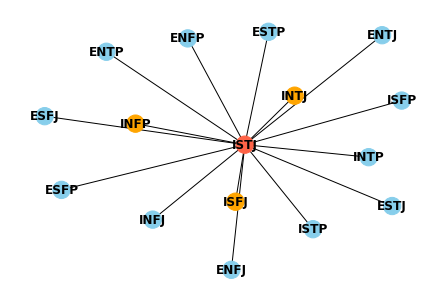

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

In [ ]:
f1 = []
f2 = []
f3 = []
f4 = []
f5 = []
f6 = []
f7 = []
f8 = []
f9 = []
f10 = []
f11 = []
f12 = []
f13 = []
f14 = []
f15 = []
f16 = []

for i in New:
  if 'istj' in i:
    f1.append(i)
  if 'istp' in i:
    f2.append(i)
  if 'isfj' in i:
    f3.append(i)
  if 'isfp' in i:
    f4.append(i)
  if 'infj' in i:
    f5.append(i)
  if 'infp' in i:
    f6.append(i)
  if 'intj' in i:
    f7.append(i)
  if 'intp' in i:
    f8.append(i)
  if 'estp' in i:
    f9.append(i)
  if 'estj' in i:
    f10.append(i)
  if 'esfp' in i:
    f11.append(i)
  if 'esfj' in i:
    f12.append(i)
  if 'enfp' in i:
    f13.append(i)
  if 'enfj' in i:
    f14.append(i)
  if 'entp' in i:
    f15.append(i)
  if 'entj' in i:
    f16.append(i)

dfs = [f1,f2,f3,f4,f5,f6,f7,f8,
       f9,f10,f11,f12,f13,f14,f15,f16]

prop = {}
for i in range(len(dfs)):
  count = 0
  for row in dfs[i]:
    values = sen.polarity_scores(str(row))['compound']
    if values > 0:
        count += 1
  prop[All[i]] = (round(count/len(dfs[i]),2)) * 100

In [ ]:
sorted(prop.items(), key = lambda x: x[1], reverse = True)

[('estp', 55.00000000000001),
 ('istj', 50.0),
 ('enfp', 50.0),
 ('isfj', 49.0),
 ('infj', 49.0),
 ('infp', 49.0),
 ('intp', 49.0),
 ('isfp', 48.0),
 ('intj', 48.0),
 ('estj', 48.0),
 ('enfj', 48.0),
 ('esfp', 47.0),
 ('esfj', 47.0),
 ('entp', 46.0),
 ('entj', 46.0),
 ('istp', 45.0)]

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
colors = ['skyblue','skyblue','green','skyblue','skyblue','skyblue','skyblue','skyblue',
          'tomato','skyblue','green','skyblue','skyblue','skyblue','skyblue','skyblue']

In [ ]:
plot("ISTJ")

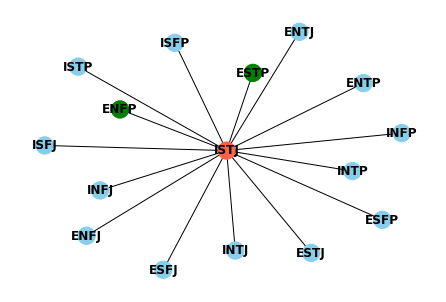

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

# Data Division -  I/E, N/S, F/T, P/J

In [20]:
I = DF[:8]
I

,Type,Text
0,ISTJ,\n Introduction\n\n\nWho is A Logistician (...
1,ISTP,\n Introduction\n\n\nWho is A Virtuoso (IST...
2,ISFJ,\n Introduction\n\n\nWho is A Defender (ISF...
3,ISFP,\n Introduction\n\n\nWho is An Adventurer (...
4,INFJ,\n Introduction\n\n\nWho is An Advocate (IN...
5,INFP,\n Introduction\n\n\nWho is A Mediator (INF...
6,INTJ,\n Introduction\n\n\nWho is An Architect (I...
7,INTP,\n Introduction\n\n\nWho is A Logician (INT...


In [21]:
E = DF[8:]
E

,Type,Text
8,ESTP,\n Introduction\n\n\nWho is An Entrepreneur...
9,ESTJ,\n Introduction\n\n\nWho is An Executive (E...
10,ESFP,\n Introduction\n\n\nWho is An Entertainer ...
11,ESFJ,\n Introduction\n\n\nWho is A Consul (ESFJ)...
12,ENFP,\n Introduction\n\n\nWho is A Campaigner (E...
13,ENFJ,\n Introduction\n\n\nWho is A Protagonist (...
14,ENTP,\n Introduction\n\n\nWho is A Debater (ENTP...
15,ENTJ,\n Introduction\n\n\nWho is A Commander (EN...


In [22]:
S = DF.iloc[[0,1,2,3,8,9,10,11]]
S

,Type,Text
0,ISTJ,\n Introduction\n\n\nWho is A Logistician (...
1,ISTP,\n Introduction\n\n\nWho is A Virtuoso (IST...
2,ISFJ,\n Introduction\n\n\nWho is A Defender (ISF...
3,ISFP,\n Introduction\n\n\nWho is An Adventurer (...
8,ESTP,\n Introduction\n\n\nWho is An Entrepreneur...
9,ESTJ,\n Introduction\n\n\nWho is An Executive (E...
10,ESFP,\n Introduction\n\n\nWho is An Entertainer ...
11,ESFJ,\n Introduction\n\n\nWho is A Consul (ESFJ)...


In [23]:
N = DF.iloc[[4,5,6,7,12,13,14,15]]
N

,Type,Text
4,INFJ,\n Introduction\n\n\nWho is An Advocate (IN...
5,INFP,\n Introduction\n\n\nWho is A Mediator (INF...
6,INTJ,\n Introduction\n\n\nWho is An Architect (I...
7,INTP,\n Introduction\n\n\nWho is A Logician (INT...
12,ENFP,\n Introduction\n\n\nWho is A Campaigner (E...
13,ENFJ,\n Introduction\n\n\nWho is A Protagonist (...
14,ENTP,\n Introduction\n\n\nWho is A Debater (ENTP...
15,ENTJ,\n Introduction\n\n\nWho is A Commander (EN...


In [24]:
F = DF.iloc[[2,3,4,5,10,11,12,13]]
F

,Type,Text
2,ISFJ,\n Introduction\n\n\nWho is A Defender (ISF...
3,ISFP,\n Introduction\n\n\nWho is An Adventurer (...
4,INFJ,\n Introduction\n\n\nWho is An Advocate (IN...
5,INFP,\n Introduction\n\n\nWho is A Mediator (INF...
10,ESFP,\n Introduction\n\n\nWho is An Entertainer ...
11,ESFJ,\n Introduction\n\n\nWho is A Consul (ESFJ)...
12,ENFP,\n Introduction\n\n\nWho is A Campaigner (E...
13,ENFJ,\n Introduction\n\n\nWho is A Protagonist (...


In [25]:
T = DF.iloc[[0,1,6,7,8,9,14,15]]
T

,Type,Text
0,ISTJ,\n Introduction\n\n\nWho is A Logistician (...
1,ISTP,\n Introduction\n\n\nWho is A Virtuoso (IST...
6,INTJ,\n Introduction\n\n\nWho is An Architect (I...
7,INTP,\n Introduction\n\n\nWho is A Logician (INT...
8,ESTP,\n Introduction\n\n\nWho is An Entrepreneur...
9,ESTJ,\n Introduction\n\n\nWho is An Executive (E...
14,ENTP,\n Introduction\n\n\nWho is A Debater (ENTP...
15,ENTJ,\n Introduction\n\n\nWho is A Commander (EN...


In [26]:
J = DF.iloc[[0,2,4,6,9,11,13,15]]
J

,Type,Text
0,ISTJ,\n Introduction\n\n\nWho is A Logistician (...
2,ISFJ,\n Introduction\n\n\nWho is A Defender (ISF...
4,INFJ,\n Introduction\n\n\nWho is An Advocate (IN...
6,INTJ,\n Introduction\n\n\nWho is An Architect (I...
9,ESTJ,\n Introduction\n\n\nWho is An Executive (E...
11,ESFJ,\n Introduction\n\n\nWho is A Consul (ESFJ)...
13,ENFJ,\n Introduction\n\n\nWho is A Protagonist (...
15,ENTJ,\n Introduction\n\n\nWho is A Commander (EN...


In [27]:
P = DF.iloc[[1,3,5,7,8,10,12,14]]
P

,Type,Text
1,ISTP,\n Introduction\n\n\nWho is A Virtuoso (IST...
3,ISFP,\n Introduction\n\n\nWho is An Adventurer (...
5,INFP,\n Introduction\n\n\nWho is A Mediator (INF...
7,INTP,\n Introduction\n\n\nWho is A Logician (INT...
8,ESTP,\n Introduction\n\n\nWho is An Entrepreneur...
10,ESFP,\n Introduction\n\n\nWho is An Entertainer ...
12,ENFP,\n Introduction\n\n\nWho is A Campaigner (E...
14,ENTP,\n Introduction\n\n\nWho is A Debater (ENTP...


In [28]:
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [29]:
STOP = stopwords.words('english')
Extra = ['introduction','strengths','weaknesses',
         'career','paths','workplace','subordinates','colleagues', 'fine','deeper',
         'managers','conclusion','someone','overview', 'aspect', 'different','similar',
         'key','cognitive','functions','tips', 'day','month','year', 'individual',
         'interacting','dominant','auxillary','tertiary','inferior','many','much',
         'little','good','great','long','new','personal','true','able', 'everyone', 'anyone',
         'need','tend','time','way','something','world','work','life','p','n']
         #Some of these words appear on the web pages for all personalities, better to exclude them
STOP = STOP + Extra

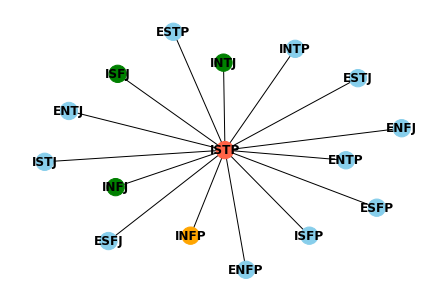

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

## ISTP

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Final Project/ISTP_All_Tweets.csv')
df2 = MBTI[MBTI['type'] == 'ISTP']
Merge = np.concatenate((df1['Text'], df2['posts']), axis = 0)

New = []
for _ in Merge:
    New.append(str(_).lower())

freq = {}
tt1 = 0
tt2 = 0 
tt3 = 0
tt4 = 0
tt5 = 0
tt6 = 0
tt7 = 0
tt8 = 0
tt9 = 0
tt10 = 0
tt11 = 0
tt12 = 0
tt13 = 0
tt14 = 0
tt15 = 0
tt16 = 0

for i in New:
  if 'istj' in i:
    tt1 += 1
  if 'istp' in i:
    tt2 += 1
  if 'isfj' in i:
    tt3 += 1
  if 'isfp' in i:
    tt4 += 1
  if 'infj' in i:
    tt5 += 1
  if 'infp' in i:
    tt6 += 1
  if 'intj' in i:
    tt7 += 1
  if 'intp' in i:
    tt8 += 1
  if 'estp' in i:
    tt9 += 1
  if 'estj' in i:
    tt10 += 1
  if 'esfp' in i:
    tt11 += 1
  if 'esfj' in i:
    tt12 += 1
  if 'enfp' in i:
    tt13 += 1
  if 'enfj' in i:
    tt14 += 1
  if 'entp' in i:
    tt15 += 1
  if 'entj' in i:
    tt16 += 1
  
  freq['istj'] = tt1
  freq['istp'] = tt2 
  freq['isfj'] = tt3 
  freq['isfp'] = tt4 
  freq['infj'] = tt5 
  freq['infp'] = tt6 
  freq['intj'] = tt7 
  freq['intp'] = tt8 
  freq['estp'] = tt9 
  freq['estj'] = tt10 
  freq['esfp'] = tt11 
  freq['esfj'] = tt12 
  freq['enfp'] = tt13
  freq['enfj'] = tt14 
  freq['entp'] = tt15
  freq['entj'] = tt16 

sorted(freq.items(), key = lambda x: x[1], reverse = True)

[('istp', 23589),
 ('intp', 2793),
 ('infp', 2009),
 ('isfp', 1927),
 ('istj', 1692),
 ('intj', 1679),
 ('infj', 1649),
 ('estp', 1480),
 ('isfj', 1311),
 ('entp', 1309),
 ('enfp', 1263),
 ('enfj', 1177),
 ('esfp', 1032),
 ('entj', 1031),
 ('esfj', 966),
 ('estj', 952)]

In [ ]:
colors = ['skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue',
          'skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue']

In [ ]:
colors = ['orange','skyblue','skyblue','orange','skyblue','skyblue','skyblue','orange',
          'skyblue','tomato','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue']

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
main_plot("ISTP")

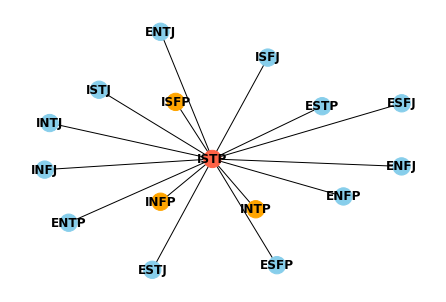

In [ ]:
nx.draw(G, node_color=colors, with_labels=True, font_weight='bold')

In [ ]:
f1 = []
f2 = []
f3 = []
f4 = []
f5 = []
f6 = []
f7 = []
f8 = []
f9 = []
f10 = []
f11 = []
f12 = []
f13 = []
f14 = []
f15 = []
f16 = []

for i in New:
  if 'istj' in i:
    f1.append(i)
  if 'istp' in i:
    f2.append(i)
  if 'isfj' in i:
    f3.append(i)
  if 'isfp' in i:
    f4.append(i)
  if 'infj' in i:
    f5.append(i)
  if 'infp' in i:
    f6.append(i)
  if 'intj' in i:
    f7.append(i)
  if 'intp' in i:
    f8.append(i)
  if 'estp' in i:
    f9.append(i)
  if 'estj' in i:
    f10.append(i)
  if 'esfp' in i:
    f11.append(i)
  if 'esfj' in i:
    f12.append(i)
  if 'enfp' in i:
    f13.append(i)
  if 'enfj' in i:
    f14.append(i)
  if 'entp' in i:
    f15.append(i)
  if 'entj' in i:
    f16.append(i)

dfs = [f1,f2,f3,f4,f5,f6,f7,f8,
       f9,f10,f11,f12,f13,f14,f15,f16]

prop = {}
for i in range(len(dfs)):
  count = 0
  for row in dfs[i]:
    values = sen.polarity_scores(str(row))['compound']
    if values > 0:
        count += 1
  prop[All[i]] = (round(count/len(dfs[i]),2)) * 100

In [ ]:
sorted(prop.items(), key = lambda x: x[1], reverse = True)

[('isfj', 49.0),
 ('infj', 49.0),
 ('infp', 49.0),
 ('intj', 49.0),
 ('isfp', 48.0),
 ('estj', 48.0),
 ('esfp', 48.0),
 ('esfj', 48.0),
 ('enfp', 48.0),
 ('istj', 47.0),
 ('intp', 47.0),
 ('estp', 47.0),
 ('enfj', 47.0),
 ('entp', 46.0),
 ('entj', 46.0),
 ('istp', 42.0)]

In [ ]:
G = nx.Graph()
G.add_nodes_from(['INFP', 'INTJ','ENFP','INTP','ENFJ','ENTP','ISFJ','ISFP',
                  'ISTJ','ISTP','ESTP','ENTJ','ESFP','ESFJ','ESTJ','INFJ'])

In [ ]:
colors = ['orange','green','skyblue','skyblue','skyblue','skyblue','green','skyblue',
          'skyblue','tomato','skyblue','skyblue','skyblue','skyblue','skyblue','green']

In [ ]:
plot("ISTP")

# Contextualization

In [ ]:
!pip install transformers

In [32]:
from transformers import pipeline
nlp = pipeline("question-answering")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)


In [ ]:
result = nlp(question="What is ENFP personality?", context=formatting(VW.Text[12]))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'Extraverted Intuitive Feeling and Perceiving People', score: 0.0525, start: 132, end: 183


In [75]:
result = nlp(question="What are the traits?", context=formatting(VW.Text[6]))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'highly analytical creative and logical', score: 0.439, start: 256, end: 294


In [83]:
MBTI.groupby(['type']).count()

,posts
type,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1470


In [77]:
result = nlp(question="What are the traits?", context=formatting(Per16.Text[6] + VW.Text[6]))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'ambitious and goal oriented', score: 0.6845, start: 5785, end: 5812


In [ ]:
result = nlp(question="What are the traits?", context=formatting(VW.Text[12]))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'energetic and independent', score: 0.2488, start: 327, end: 352


In [ ]:
result = nlp(question="What do they like?", context=formatting(VW.Text[12]))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'strong loving relationships with their kids', score: 0.2611, start: 4030, end: 4073


In [ ]:
result = nlp(question="What do they hate?", context=formatting(VW.Text[12]))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'solitude', score: 0.4775, start: 2796, end: 2804


In [ ]:
result = nlp(question="What are the traits?", context=formatting(I.Text.sum()))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'depth and intelligence', score: 0.9869, start: 168105, end: 168127


In [ ]:
result = nlp(question="How do they think?", context=formatting(I.Text.sum()))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'meticulous and orderly', score: 0.808, start: 74823, end: 74845


In [ ]:
result = nlp(question="How do they behave?", context=formatting(I.Text.sum()))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'drag their feet', score: 0.7948, start: 196933, end: 196948


In [ ]:
result = nlp(question="What are the traits?", context=formatting(J.Text.sum()))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'integrity', score: 0.9138, start: 60193, end: 60202


In [ ]:
result = nlp(question="How do they think?", context=formatting(J.Text.sum()))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'self directed', score: 0.8173, start: 133831, end: 133844


In [ ]:
result = nlp(question="How do they behave?", context=formatting(J.Text.sum()))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'with the best of intentions', score: 0.8307, start: 55226, end: 55253


In [33]:
result = nlp(question="What are the traits?", context=formatting(E.Text.sum()))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'Charismatic and Inspiring', score: 0.9237, start: 188890, end: 188915


In [34]:
result = nlp(question="How do they think?", context=formatting(E.Text.sum()))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'talkative witty', score: 0.9075, start: 53717, end: 53732


In [35]:
result = nlp(question="How do they behave?", context=formatting(E.Text.sum()))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'wherever they go Energetic', score: 0.6905, start: 187985, end: 188011


In [63]:
result = nlp(question="What are the traits?", context=formatting(P.Text.sum()))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'Introverts', score: 0.9438, start: 80153, end: 80163


In [65]:
result = nlp(question="How do they think?", context=formatting(P.Text.sum()))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'shared interests and passions', score: 0.8506, start: 133429, end: 133458


In [66]:
result = nlp(question="How do they behave?", context=formatting(P.Text.sum()))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'preferring to do what can be done', score: 0.5746, start: 121272, end: 121305


In [39]:
result = nlp(question="What are the traits?", context=formatting(T.Text.sum()))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'more emotional tact and personal liberty', score: 0.8691, start: 201403, end: 201443


In [40]:
result = nlp(question="How do they think?", context=formatting(T.Text.sum()))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'energized', score: 0.8241, start: 131995, end: 132004


In [41]:
result = nlp(question="How do they behave?", context=formatting(T.Text.sum()))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'quick witted', score: 0.6605, start: 171292, end: 171304


In [52]:
len(F.Text.sum())

221812

In [55]:
result = nlp(question="What are the traits?", context=formatting(F.Text.sum()))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'passionate experimenters', score: 0.881, start: 42712, end: 42736


In [43]:
result = nlp(question="How do they think?", context=formatting(F.Text.sum()))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'extremely empathetic', score: 0.8638, start: 215135, end: 215155


In [68]:
result = nlp(question="How do they behave?", context=formatting(F.Text.sum()))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'Sincerity honesty and authenticity', score: 0.5444, start: 77122, end: 77156


In [45]:
result = nlp(question="What are the traits?", context=formatting(S.Text.sum()))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'ups and downs', score: 0.8266, start: 66774, end: 66787


In [64]:
result = nlp(question="How do they think?", context=formatting(S.Text.sum()))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'how things should be done', score: 0.8378, start: 18809, end: 18834


In [69]:
result = nlp(question="How do they behave?", context=formatting(S.Text.sum()))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'adrenaline', score: 0.8538, start: 42166, end: 42176


In [56]:
result = nlp(question="What are the traits?", context=formatting(N.Text.sum()))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'supportive', score: 0.8004, start: 206086, end: 206096


In [49]:
result = nlp(question="How do they think?", context=formatting(N.Text.sum()))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'big', score: 0.7162, start: 181224, end: 181227


In [50]:
result = nlp(question="How do they behave?", context=formatting(N.Text.sum()))
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 'daydream and fantasize', score: 0.6509, start: 30991, end: 31013


In [58]:
import math
import numpy as np

std_embeddings_index = {}

def cosineValue(v1,v2):
    "compute cosine similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)"
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy/math.sqrt(sumxx*sumyy)


def get_sentence_vector(sentence, std_embeddings_index = std_embeddings_index ):
    sent_vector = 0
    for word in sentence.lower().split():
        if word not in std_embeddings_index :
            word_vector = np.array(np.random.uniform(-1.0, 1.0, 300))
            std_embeddings_index[word] = word_vector
        else:
            word_vector = std_embeddings_index[word]
        sent_vector = sent_vector + word_vector

    return sent_vector

def cosine_sim(sent1, sent2):
    return cosineValue(get_sentence_vector(sent1), get_sentence_vector(sent2))

In [60]:
cosine_sim('Charismatic and Inspiring', 'depth and intelligence')

0.34993681984790803

In [61]:
cosine_sim('ups and downs', 'supportive')

0.035129679179243915

In [62]:
cosine_sim('more emotional tact and personal liberty', 'passionate experimenters')

0.023728754981031955

In [ ]:
cosine_sim('integrity', 'passionate experimenters')

#Failed Attempts 

### Introversion

In [ ]:
sentences = []
for _ in I['Text'].values:
  sentences.append(formatting(_))

tokenized = sent_tokenize(str(sentences))
output = []
for i in tokenized:
    
    wordsList = nltk.word_tokenize(i.lower())

    wordsList = [w for w in wordsList if not w in STOP]
 
    tagged = nltk.pos_tag(wordsList)

    output.append(tagged)

sents = []
for i in output:
  for j in i:
    sents.append(j)

In [ ]:
NTarget = 'JJ'
Word = 'personality'
#NResults = set()
NResults = []

for (ent1, kind1),(ent2,kind2) in zip(sents[:-1], sents[1:]):
  if (kind1,ent2.lower())==(NTarget,Word):
      #NResults.add(ent1)
      NResults.append(ent1)
  else:
      continue

freq = {}
for word in NResults:
  if word not in freq.keys():
    freq[word] = 1
  else:
    freq[word] += 1

#To be deep, you have to be quiet, analytical, and someone who thinks before they speak.
for w in sorted(freq, key=freq.get, reverse=True)[:5]:
    print(w)

logistician
type
sensitive
virtuoso
opposite


In [ ]:
NTarget = 'JJ'
Word = 'trait'
#NResults = set()
NResults = []

for (ent1, kind1),(ent2,kind2) in zip(sents[:-1], sents[1:]):
  if (kind1,ent2.lower())==(NTarget,Word):
      #NResults.add(ent1)
      NResults.append(ent1)
  else:
      continue

freq = {}
for word in NResults:
  if word not in freq.keys():
    freq[word] = 1
  else:
    freq[word] += 1

for w in sorted(freq, key=freq.get, reverse=True)[:5]:
    print(w)

observant
dependable
beautiful


In [ ]:
NTarget = 'JJ'
Word = 'thoughts'
#NResults = set()
NResults = []

for (ent1, kind1),(ent2,kind2) in zip(sents[:-1], sents[1:]):
  if (kind1,ent2.lower())==(NTarget,Word):
      #NResults.add(ent1)
      NResults.append(ent1)
  else:
      continue

freq = {}
for word in NResults:
  if word not in freq.keys():
    freq[word] = 1
  else:
    freq[word] += 1

#To be deep, you have to be quiet, analytical, and someone who thinks before they speak.
for w in sorted(freq, key=freq.get, reverse=True)[:5]:
    print(w)

unconventional


In [ ]:
NTarget = 'JJ'
Word = 'behavior'
#NResults = set()
NResults = []

for (ent1, kind1),(ent2,kind2) in zip(sents[:-1], sents[1:]):
  if (kind1,ent2.lower())==(NTarget,Word):
      #NResults.add(ent1)
      NResults.append(ent1)
  else:
      continue

freq = {}
for word in NResults:
  if word not in freq.keys():
    freq[word] = 1
  else:
    freq[word] += 1

#To be deep, you have to be quiet, analytical, and someone who thinks before they speak.
for w in sorted(freq, key=freq.get, reverse=True)[:5]:
    print(w)

acceptable
risky
standoffish
wolf


## Extroversion

In [ ]:
sentences = []
for _ in E['Text'].values:
  sentences.append(formatting(_))

tokenized = sent_tokenize(str(sentences))
output = []
for i in tokenized:
    
    wordsList = nltk.word_tokenize(i.lower())

    wordsList = [w for w in wordsList if not w in STOP]
 
    tagged = nltk.pos_tag(wordsList)

    output.append(tagged)

sents = []
for i in output:
  for j in i:
    sents.append(j)

In [ ]:
NTarget = 'JJ'
Word = 'personality'
#NResults = set()
NResults = []

for (ent1, kind1),(ent2,kind2) in zip(sents[:-1], sents[1:]):
  if (kind1,ent2.lower())==(NTarget,Word):
      #NResults.add(ent1)
      NResults.append(ent1)
  else:
      continue

freq = {}
for word in NResults:
  if word not in freq.keys():
    freq[word] = 1
  else:
    freq[word] += 1

#To be deep, you have to be quiet, analytical, and someone who thinks before they speak.
for w in sorted(freq, key=freq.get, reverse=True)[:5]:
    print(w)

consul
protagonist
common
certain
type


In [ ]:
NTarget = 'JJ'
Word = 'trait'
#NResults = set()
NResults = []

for (ent1, kind1),(ent2,kind2) in zip(sents[:-1], sents[1:]):
  if (kind1,ent2.lower())==(NTarget,Word):
      #NResults.add(ent1)
      NResults.append(ent1)
  else:
      continue

freq = {}
for word in NResults:
  if word not in freq.keys():
    freq[word] = 1
  else:
    freq[word] += 1

for w in sorted(freq, key=freq.get, reverse=True)[:5]:
    print(w)

observant
trust
intuitive


In [ ]:
NTarget = 'JJ'
Word = 'thoughts'
#NResults = set()
NResults = []

for (ent1, kind1),(ent2,kind2) in zip(sents[:-1], sents[1:]):
  if (kind1,ent2.lower())==(NTarget,Word):
      #NResults.add(ent1)
      NResults.append(ent1)
  else:
      continue

freq = {}
for word in NResults:
  if word not in freq.keys():
    freq[word] = 1
  else:
    freq[word] += 1

#To be deep, you have to be quiet, analytical, and someone who thinks before they speak.
for w in sorted(freq, key=freq.get, reverse=True)[:5]:
    print(w)

fresh
express
quick


In [ ]:
NTarget = 'JJ'
Word = 'behavior'
#NResults = set()
NResults = []

for (ent1, kind1),(ent2,kind2) in zip(sents[:-1], sents[1:]):
  if (kind1,ent2.lower())==(NTarget,Word):
      #NResults.add(ent1)
      NResults.append(ent1)
  else:
      continue

freq = {}
for word in NResults:
  if word not in freq.keys():
    freq[word] = 1
  else:
    freq[word] += 1

#To be deep, you have to be quiet, analytical, and someone who thinks before they speak.
for w in sorted(freq, key=freq.get, reverse=True)[:5]:
    print(w)

risky
unusual
social
pattern


## Sensing

In [ ]:
sentences = []
for _ in S['Text'].values:
  sentences.append(formatting(_))

tokenized = sent_tokenize(str(sentences))
output = []
for i in tokenized:
    
    wordsList = nltk.word_tokenize(i.lower())

    wordsList = [w for w in wordsList if not w in STOP]
 
    tagged = nltk.pos_tag(wordsList)

    output.append(tagged)

sents = []
for i in output:
  for j in i:
    sents.append(j)

In [ ]:
NTarget = 'JJ'
Word = 'personality'
#NResults = set()
NResults = []

for (ent1, kind1),(ent2,kind2) in zip(sents[:-1], sents[1:]):
  if (kind1,ent2.lower())==(NTarget,Word):
      #NResults.add(ent1)
      NResults.append(ent1)
  else:
      continue

freq = {}
for word in NResults:
  if word not in freq.keys():
    freq[word] = 1
  else:
    freq[word] += 1

#To be deep, you have to be quiet, analytical, and someone who thinks before they speak.
for w in sorted(freq, key=freq.get, reverse=True)[:5]:
    print(w)

logistician
common
consul
virtuoso
certain


In [ ]:
NTarget = 'JJ'
Word = 'trait'
#NResults = set()
NResults = []

for (ent1, kind1),(ent2,kind2) in zip(sents[:-1], sents[1:]):
  if (kind1,ent2.lower())==(NTarget,Word):
      #NResults.add(ent1)
      NResults.append(ent1)
  else:
      continue

freq = {}
for word in NResults:
  if word not in freq.keys():
    freq[word] = 1
  else:
    freq[word] += 1

for w in sorted(freq, key=freq.get, reverse=True)[:5]:
    print(w)

observant
dependable


In [ ]:
NTarget = 'JJ'
Word = 'thoughts'
#NResults = set()
NResults = []

for (ent1, kind1),(ent2,kind2) in zip(sents[:-1], sents[1:]):
  if (kind1,ent2.lower())==(NTarget,Word):
      #NResults.add(ent1)
      NResults.append(ent1)
  else:
      continue

freq = {}
for word in NResults:
  if word not in freq.keys():
    freq[word] = 1
  else:
    freq[word] += 1

#To be deep, you have to be quiet, analytical, and someone who thinks before they speak.
for w in sorted(freq, key=freq.get, reverse=True)[:5]:
    print(w)

In [ ]:
NTarget = 'JJ'
Word = 'behavior'
#NResults = set()
NResults = []

for (ent1, kind1),(ent2,kind2) in zip(sents[:-1], sents[1:]):
  if (kind1,ent2.lower())==(NTarget,Word):
      #NResults.add(ent1)
      NResults.append(ent1)
  else:
      continue

freq = {}
for word in NResults:
  if word not in freq.keys():
    freq[word] = 1
  else:
    freq[word] += 1

#To be deep, you have to be quiet, analytical, and someone who thinks before they speak.
for w in sorted(freq, key=freq.get, reverse=True)[:5]:
    print(w)

risky
acceptable
standoffish
unusual


## Intuition

In [ ]:
sentences = []
for _ in N['Text'].values:
  sentences.append(formatting(_))

tokenized = sent_tokenize(str(sentences))
output = []
for i in tokenized:
    
    wordsList = nltk.word_tokenize(i.lower())

    wordsList = [w for w in wordsList if not w in STOP]
 
    tagged = nltk.pos_tag(wordsList)

    output.append(tagged)

sents = []
for i in output:
  for j in i:
    sents.append(j)

In [ ]:
NTarget = 'JJ'
Word = 'personality'
#NResults = set()
NResults = []

for (ent1, kind1),(ent2,kind2) in zip(sents[:-1], sents[1:]):
  if (kind1,ent2.lower())==(NTarget,Word):
      #NResults.add(ent1)
      NResults.append(ent1)
  else:
      continue

freq = {}
for word in NResults:
  if word not in freq.keys():
    freq[word] = 1
  else:
    freq[word] += 1

#To be deep, you have to be quiet, analytical, and someone who thinks before they speak.
for w in sorted(freq, key=freq.get, reverse=True)[:5]:
    print(w)

type
sensitive
protagonist
rare
intj


In [ ]:
NTarget = 'JJ'
Word = 'trait'
#NResults = set()
NResults = []

for (ent1, kind1),(ent2,kind2) in zip(sents[:-1], sents[1:]):
  if (kind1,ent2.lower())==(NTarget,Word):
      #NResults.add(ent1)
      NResults.append(ent1)
  else:
      continue

freq = {}
for word in NResults:
  if word not in freq.keys():
    freq[word] = 1
  else:
    freq[word] += 1

for w in sorted(freq, key=freq.get, reverse=True)[:5]:
    print(w)

beautiful
trust
intuitive


In [ ]:
NTarget = 'JJ'
Word = 'thoughts'
#NResults = set()
NResults = []

for (ent1, kind1),(ent2,kind2) in zip(sents[:-1], sents[1:]):
  if (kind1,ent2.lower())==(NTarget,Word):
      #NResults.add(ent1)
      NResults.append(ent1)
  else:
      continue

freq = {}
for word in NResults:
  if word not in freq.keys():
    freq[word] = 1
  else:
    freq[word] += 1

#To be deep, you have to be quiet, analytical, and someone who thinks before they speak.
for w in sorted(freq, key=freq.get, reverse=True)[:5]:
    print(w)

unconventional
fresh
express
quick


In [ ]:
NTarget = 'JJ'
Word = 'behavior'
#NResults = set()
NResults = []

for (ent1, kind1),(ent2,kind2) in zip(sents[:-1], sents[1:]):
  if (kind1,ent2.lower())==(NTarget,Word):
      #NResults.add(ent1)
      NResults.append(ent1)
  else:
      continue

freq = {}
for word in NResults:
  if word not in freq.keys():
    freq[word] = 1
  else:
    freq[word] += 1

#To be deep, you have to be quiet, analytical, and someone who thinks before they speak.
for w in sorted(freq, key=freq.get, reverse=True)[:5]:
    print(w)

wolf
social
pattern
